<h1 style="text-align: center;">Arabic Dialect Identification<h1>

Prepare libraries

In [ ]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package

import pandas as pd
import os
import matplotlib.pyplot as plt
import re # import the re module

Load data

In [ ]:
!pip install datasets


In [ ]:
from datasets import load_dataset

In [ ]:
# فك ضغط ملفات MADAR
!unzip MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021.zip -d madar_data/

Archive:  MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021.zip
   creating: madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/
  inflating: madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/The_MADAR_Arabic_Dialect_Corpus_and_Lexicon.pdf  
  inflating: madar_data/__MACOSX/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/._The_MADAR_Arabic_Dialect_Corpus_and_Lexicon.pdf  
  inflating: madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/README.txt  
  inflating: madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/LICENSE.txt  
   creating: madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/MADAR_Corpus/
  inflating: madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/Icon  
  inflating: madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/MADAR_Corpus/MADAR.corpus.Rabat.tsv  
  inflating: madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/MADAR_Corpus/MADAR.corpus.English.index.tsv  
  inflating: mad

<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:

قم بوضع الخلايا الأربع التالية لحل كل طلب</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [ ]:
# your code here


In [ ]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# مهمة 01  : تحميل البيانات

## [1.1]

تحميل مجموعة البيانات MADAR

In [ ]:
madar_data = load_dataset("/content/madar_data/MADAR.Parallel-Corpora-Public-Version1.1-25MAR2021/MADAR_Corpus")

# طباعة أسماء الأقسام الموجودة في مجموعة MADAR
print("Available splits in MADAR dataset:")
print(madar_data)


Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Available splits in MADAR dataset:
DatasetDict({
    train: Dataset({
        features: ['sentID.BTEC', 'split', 'lang', 'sent'],
        num_rows: 136000
    })
})


QADI تحميل مجموعة البيانات

In [ ]:
qadi_data = load_dataset("Abdelrahman-Rezk/Arabic_Dialect_Identification")

# طباعة أسماء الأقسام في QADI
print("Available splits in QADI dataset:")
print(qadi_data)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


Available splits in QADI dataset:
DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'text'],
        num_rows: 440052
    })
    validation: Dataset({
        features: ['id', 'label', 'text'],
        num_rows: 9164
    })
    test: Dataset({
        features: ['id', 'label', 'text'],
        num_rows: 8981
    })
})


In [ ]:
# تحويل بيانات MADAR إلى DataFrame
madar_df = pd.DataFrame(madar_data["train"])

# عرض أول 5 أسطر لفحص البيانات
print("أول 5 أسطر من بيانات MADAR:")
print(madar_df.head())

# عرض القيم الفريدة في عمود "split"
print("\nالقيم الفريدة في عمود 'split':")
print(madar_df["split"].unique())


أول 5 أسطر من بيانات MADAR:
   sentID.BTEC                          split lang  \
0            5  corpus-6-test-corpus-26-train  ALE   
1            9  corpus-6-test-corpus-26-train  ALE   
2           11  corpus-6-test-corpus-26-train  ALE   
3           26  corpus-6-test-corpus-26-train  ALE   
4           27  corpus-6-test-corpus-26-train  ALE   

                                   sent  
0  هو هنيك، قدام معلومات السياح بالضبط.  
1      مالي سمعان من قبل بهالعنوان هون.  
2         روح ساوي لبين ما تشوف صيدلية.  
3                          بشقد الفطور؟  
4                     شلون بقدر أساعدك؟  

القيم الفريدة في عمود 'split':
['corpus-6-test-corpus-26-train' 'corpus-6-test-corpus-26-test'
 'corpus-6-test-corpus-26-dev' 'corpus-6-train' 'corpus-6-dev']


In [ ]:
# توحيد تسميات التقسيمات إلى "train", "valid", "test"
split_mapping = {
    "corpus-6-train": "train",
    "corpus-6-test-corpus-26-train": "train",
    "corpus-6-dev": "validation",
    "corpus-6-test-corpus-26-dev": "validation",
    "corpus-6-test-corpus-26-test": "test"
}

madar_df["split"] = madar_df["split"].replace(split_mapping)

# عرض توزيع البيانات حسب الأقسام
print("\nتوزيع البيانات حسب الأقسام:")
print(madar_df["split"].value_counts())



توزيع البيانات حسب الأقسام:
split
train         116800
validation     13600
test            5600
Name: count, dtype: int64


In [ ]:
folder_name = "madar"

# إنشاء المجلد إذا لم يكن موجودًا
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [ ]:
output_file = "madar_data_processed.csv"

# تخزين إطار البيانات في ملف CSV داخل المجلد
madar_df.to_csv(os.path.join(folder_name, output_file), index=False, encoding='utf-8')

print(f"\nتم حفظ البيانات في الملف: {os.path.join(folder_name, output_file)}")


تم حفظ البيانات في الملف: madar/madar_data_processed.csv


تقسيم البيانات في MADAR

In [ ]:
# فصل البيانات حسب الأقسام
madar_train_df = madar_df[madar_df["split"] == "train"]
madar_val_df = madar_df[madar_df["split"] == "validation"]
madar_test_df = madar_df[madar_df["split"] == "test"]

# عرض توزيع البيانات
print("\nتوزيع البيانات حسب الأقسام:")
print(madar_df["split"].value_counts())

# تخزين كل قسم في ملف CSV
madar_train_df.to_csv(os.path.join(folder_name, "madar_train.csv" ), index=False, encoding="utf-8")
madar_val_df.to_csv(os.path.join(folder_name, "madar_validation.csv"), index=False, encoding="utf-8")
madar_test_df.to_csv(os.path.join(folder_name,"madar_test.csv"), index=False, encoding="utf-8")



توزيع البيانات حسب الأقسام:
split
train         116800
validation     13600
test            5600
Name: count, dtype: int64


إنشاء DataFrame لكل من train,test,validation لمجموعة البيانات QADI

In [ ]:
# إنشاء DataFrame لكل قسم (train, test, validation)
qadi_train_df = pd.DataFrame(qadi_data["train"])  # بيانات التدريب
qadi_test_df = pd.DataFrame(qadi_data["test"])    # بيانات الاختبار
qadi_val_df = pd.DataFrame(qadi_data["validation"])  # بيانات التحقق

# التحقق من البيانات
print("أول 5 أسطر من بيانات التدريب:")
print(qadi_train_df.head())

print("\nأول 5 أسطر من بيانات الاختبار:")
print(qadi_test_df.head())

print("\nأول 5 أسطر من بيانات التحقق:")
print(qadi_val_df.head())


أول 5 أسطر من بيانات التدريب:
                    id  label  \
0  1046024946705735552      9   
1  1140189387508134016     17   
2  1051416181855440768      0   
3   781770259422412800     11   
4   968140551366340608     11   

                                                text  
0  @Ahmed_Hamza27 اتمنى صراحة و خصوصا #طال_عمره ب...  
1  @rJiM4CnIFTgml9g @zamnissi طبعا عرفته من اللي ...  
2  @OmanisFollowers @ooredoo @TRA_OMAN @motc_om ه...  
3  كلب شو كنتوا بتتوقعوا منه !؟ \n\nمحمود عباس لا...  
4                  #عزام 🔊\nاحنا ابو الولد وام الولد  

أول 5 أسطر من بيانات الاختبار:
                    id  label  \
0  1159906099585327104     10   
1   950123809608171648     14   
2  1091295506960142336      2   
3  1179845110718181376     14   
4  1011983655546302464     10   

                                                text  
0  ايه الخيبة و الهرتلة قدام الجون دول؟؟ 🤪😲\nالعي...  
1         @FIA_WIS تذكرت ما اسمي عائشة انا اسمي خولة  
2  @showqiy @3nood_mh لا والله نروح نشجع قطر 

In [ ]:
folder_name1 = "qadi"

# إنشاء المجلد إذا لم يكن موجودًا
if not os.path.exists(folder_name1):
    os.makedirs(folder_name1)


In [ ]:
qadi_train_df.to_csv(os.path.join(folder_name1,"qadi_train.csv"), index=False, encoding="utf-8")
qadi_test_df.to_csv(os.path.join(folder_name1,"qadi_test.csv"), index=False, encoding="utf-8")
qadi_val_df.to_csv(os.path.join(folder_name1,"qadi_validation.csv"), index=False, encoding="utf-8")


MADAR

In [ ]:
# طباعة أول 10 أسطر وعدد العينات الكلي لكل قسم
for split_name, split_df in [("train", madar_train_df), ("validation", madar_val_df), ("test", madar_test_df)]:
    print(f"\nقسم {split_name}:")
    print(f"عدد العينات الكلي: {len(split_df)}")
    print("أول 10 أسطر:")
    print(split_df.head(10))

    # التحقق من الأسطر المكررة
    duplicate_count = split_df.duplicated().sum()
    print(f"\nعدد الأسطر المكررة في قسم {split_name}: {duplicate_count}")

    # التحقق من الخلايا الفارغة أو التي تحتوي على NaN
    nan_count = split_df.isnull().sum().sum()
    print(f"عدد الخلايا الفارغة أو التي تحتوي على NaN في قسم {split_name}: {nan_count}")


قسم train:
عدد العينات الكلي: 116800
أول 10 أسطر:
   sentID.BTEC  split lang                                  sent
0            5  train  ALE  هو هنيك، قدام معلومات السياح بالضبط.
1            9  train  ALE      مالي سمعان من قبل بهالعنوان هون.
2           11  train  ALE         روح ساوي لبين ما تشوف صيدلية.
3           26  train  ALE                          بشقد الفطور؟
4           27  train  ALE                     شلون بقدر أساعدك؟
5           30  train  ALE            روح عاليسار عند تالت مفرق.
6           50  train  ALE              بتريد كريمة وسكر بقهوتك؟
7           64  train  ALE    خرج تصرفلي شيك الميتين دولار تبعي؟
8           74  train  ALE    إذا لازم يبين، اتصل فيني إذا سمحت.
9           86  train  ALE                          وين الكافيه؟

عدد الأسطر المكررة في قسم train: 0
عدد الخلايا الفارغة أو التي تحتوي على NaN في قسم train: 21200

قسم validation:
عدد العينات الكلي: 13600
أول 10 أسطر:
     sentID.BTEC       split lang  \
47           398  validation  ALE   
48     

QADI

In [ ]:
# طباعة أول 10 أسطر وعدد العينات الكلي لكل قسم
for split_name, split_df in [("train", qadi_train_df), ("validation", qadi_val_df), ("test", qadi_test_df)]:
    print(f"\nقسم {split_name}:")
    print(f"عدد العينات الكلي: {len(split_df)}")
    print("أول 10 أسطر:")
    print(split_df.head(10))

    # التحقق من الأسطر المكررة
    duplicate_count = split_df.duplicated().sum()
    print(f"\nعدد الأسطر المكررة في قسم {split_name}: {duplicate_count}")

    # التحقق من الخلايا الفارغة أو التي تحتوي على NaN
    nan_count = split_df.isnull().sum().sum()
    print(f"عدد الخلايا الفارغة أو التي تحتوي على NaN في قسم {split_name}: {nan_count}")


قسم train:
عدد العينات الكلي: 440052
أول 10 أسطر:
                    id  label  \
0  1046024946705735552      9   
1  1140189387508134016     17   
2  1051416181855440768      0   
3   781770259422412800     11   
4   968140551366340608     11   
5  1129830890069270400      2   
6  1055146289791258624      4   
7  1040998864327794816     17   
8   966103834618744832     10   
9  1126962565261811584      2   

                                                text  
0  @Ahmed_Hamza27 اتمنى صراحة و خصوصا #طال_عمره ب...  
1  @rJiM4CnIFTgml9g @zamnissi طبعا عرفته من اللي ...  
2  @OmanisFollowers @ooredoo @TRA_OMAN @motc_om ه...  
3  كلب شو كنتوا بتتوقعوا منه !؟ \n\nمحمود عباس لا...  
4                  #عزام 🔊\nاحنا ابو الولد وام الولد  
5  @HussamAAlsaleh1 الله يبشرررررك بالجنة يابو سع...  
6  @Ocxoc @AlArabiya_Brk والله العظيم انه مجرد تق...  
7          @anasyounis52 اها مستوى أقل شوية هههههههه  
8  قلبي مقبوض ، بقالي كام يوم مش متظبط و اتمني ان...  
9            @ryanovic_nfc خوينا ذا

الدمج في DataFrame واحدة


In [ ]:
folder_name2 = "combined"

# إنشاء المجلد إذا لم يكن موجودًا
if not os.path.exists(folder_name2):
    os.makedirs(folder_name2)


In [ ]:
# إعادة تسمية أعمدة QADI لتتوافق مع MADAR
qadi_train_df.rename(columns={"id": "sentID.BTEC", "text": "sent", "label": "Abbriviation"}, inplace=True)
qadi_test_df.rename(columns={"id": "sentID.BTEC", "text": "sent", "label": "Abbriviation"}, inplace=True)
qadi_val_df.rename(columns={"id": "sentID.BTEC", "text": "sent", "label": "Abbriviation"}, inplace=True)

# دمج بيانات train
combined_train_df = pd.concat([madar_train_df, qadi_train_df], ignore_index=True)

# دمج بيانات validation
combined_val_df = pd.concat([madar_val_df, qadi_val_df], ignore_index=True)

# دمج بيانات test
combined_test_df = pd.concat([madar_test_df, qadi_test_df], ignore_index=True)

# التحقق من شكل البيانات المدمجة
print("عدد العينات في بيانات train المدمجة:", len(combined_train_df))
print("عدد العينات في بيانات validation المدمجة:", len(combined_val_df))
print("عدد العينات في بيانات test المدمجة:", len(combined_test_df))

# تخزين البيانات المدمجة في ملفات CSV
combined_train_df.to_csv(os.path.join(folder_name2,"combined_train.csv"), index=False, encoding="utf-8")
combined_val_df.to_csv(os.path.join(folder_name2,"combined_validation.csv"), index=False, encoding="utf-8")
combined_test_df.to_csv(os.path.join(folder_name2,"combined_test.csv"), index=False, encoding="utf-8")

print("تم حفظ البيانات المدمجة بنجاح!")


عدد العينات في بيانات train المدمجة: 556852
عدد العينات في بيانات validation المدمجة: 22764
عدد العينات في بيانات test المدمجة: 14581
تم حفظ البيانات المدمجة بنجاح!


In [ ]:
# طباعة أول 10 أسطر والتحقق من البيانات
for split_name, split_df in [("train", combined_train_df),
                             ("validation", combined_val_df),
                             ("test", combined_test_df)]:
    print(f"\nقسم {split_name}:")
    print(f"عدد العينات الكلي: {len(split_df)}")

    # طباعة أول 10 أسطر
    print("أول 10 أسطر:")
    print(split_df.head(10))

    # التحقق من الأسطر المكررة
    duplicate_count = split_df.duplicated().sum()
    print(f"\nعدد الأسطر المكررة في قسم {split_name}: {duplicate_count}")

    # التحقق من الخلايا الفارغة أو التي تحتوي على NaN
    nan_count = split_df.isnull().sum().sum()
    print(f"عدد الخلايا الفارغة أو التي تحتوي على NaN في قسم {split_name}: {nan_count}")



قسم train:
عدد العينات الكلي: 556852
أول 10 أسطر:
   sentID.BTEC  split lang                                  sent  Abbriviation
0            5  train  ALE  هو هنيك، قدام معلومات السياح بالضبط.           NaN
1            9  train  ALE      مالي سمعان من قبل بهالعنوان هون.           NaN
2           11  train  ALE         روح ساوي لبين ما تشوف صيدلية.           NaN
3           26  train  ALE                          بشقد الفطور؟           NaN
4           27  train  ALE                     شلون بقدر أساعدك؟           NaN
5           30  train  ALE            روح عاليسار عند تالت مفرق.           NaN
6           50  train  ALE              بتريد كريمة وسكر بقهوتك؟           NaN
7           64  train  ALE    خرج تصرفلي شيك الميتين دولار تبعي؟           NaN
8           74  train  ALE    إذا لازم يبين، اتصل فيني إذا سمحت.           NaN
9           86  train  ALE                          وين الكافيه؟           NaN

عدد الأسطر المكررة في قسم train: 0
عدد الخلايا الفارغة أو التي تحتوي على NaN في

## [1.2]

In [ ]:
file_path = "/content/dialect_name_unification.xlsx"
dialect_data = pd.read_excel(file_path)

# Display the first few rows to understand its structure
dialect_data.head()


,Unnamed: 0,Region,Unnamed: 2,Unnamed: 3,Country,Unnamed: 5,Unnamed: 6,City,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abbriviation,English name,Arabic name,Abbriviation,English name,Arabic name,Abbriviation,English name,Arabic name
2,NaN,Maghreb,المغاربية,MA,Morocco,المغرب,RAB,Rabat,الرباط
3,NaN,Maghreb,المغاربية,MA,Morocco,المغرب,FES,Fes,فاس
4,NaN,Maghreb,المغاربية,DZ,Algeria,الجزائر,ALG,Algiers,الجزائر


In [ ]:
dialect_data = pd.read_excel(file_path, header=2)  # يحدد أن السطر الثالث (index = 1) يحتوي على أسماء الأعمدة
print(dialect_data.columns)


Index(['Abbriviation', 'English name', 'Arabic name', 'Abbriviation.1',
       'English name.1', 'Arabic name.1', 'Abbriviation.2', 'English name.2',
       'Arabic name.2'],
      dtype='object')


In [ ]:
dialect_data = dialect_data.drop(dialect_data.columns[0], axis=1)  # حذف العمود الأول
print(dialect_data.columns)


Index(['English name', 'Arabic name', 'Abbriviation.1', 'English name.1',
       'Arabic name.1', 'Abbriviation.2', 'English name.2', 'Arabic name.2'],
      dtype='object')


In [ ]:
print(dialect_data)


   English name Arabic name Abbriviation.1 English name.1 Arabic name.1  \
0       Maghreb   المغاربية             MA        Morocco        المغرب   
1       Maghreb   المغاربية             MA        Morocco        المغرب   
2       Maghreb   المغاربية             DZ        Algeria       الجزائر   
3       Maghreb   المغاربية             DZ        Algeria       الجزائر   
4       Maghreb   المغاربية             TN        Tunisia          تونس   
5       Maghreb   المغاربية             TN        Tunisia          تونس   
6       Maghreb   المغاربية             LY          Libya         ليبيا   
7       Maghreb   المغاربية             LY          Libya         ليبيا   
8    Nile_Basin   حوض النيل             EG          Egypt           مصر   
9    Nile_Basin   حوض النيل             EG          Egypt           مصر   
10   Nile_Basin   حوض النيل             EG          Egypt           مصر   
11   Nile_Basin   حوض النيل             SD          Sudan       السودان   
12       Levant     الشام

In [ ]:
# تحديد الأعمدة المطلوبة فقط
columns_to_keep = ['Arabic name', 'Arabic name.1', 'Abbriviation.2']
dialect_data = dialect_data[columns_to_keep]

# عرض أول 5 أسطر للتأكد
print(dialect_data.head())


  Arabic name Arabic name.1 Abbriviation.2
0   المغاربية        المغرب            RAB
1   المغاربية        المغرب            FES
2   المغاربية       الجزائر            ALG
3   المغاربية       الجزائر            ANB
4   المغاربية          تونس            TUN


In [ ]:
dialect_data.rename(columns={"Abbriviation.2": "lang"}, inplace=True)  # إعادة تسمية 'Abbriviation.2' إلى 'lang'
print(dialect_data.columns)

Index(['Arabic name', 'Arabic name.1', 'lang'], dtype='object')


In [ ]:
# دمج بيانات train
combined_train_df = pd.merge(combined_train_df, dialect_data, on="lang", how="left")
#إعادة تسمية الأعمدة
combined_train_df = combined_train_df.rename(columns={
            'Arabic name': 'Region',
            'Arabic name.1': 'Country'
        })
# التحقق من البيانات المدمجة
print("شكل بيانات train المدمجة:")
print(combined_train_df.head())

شكل بيانات train المدمجة:
   sentID.BTEC  split lang                                  sent  \
0            5  train  ALE  هو هنيك، قدام معلومات السياح بالضبط.   
1            9  train  ALE      مالي سمعان من قبل بهالعنوان هون.   
2           11  train  ALE         روح ساوي لبين ما تشوف صيدلية.   
3           26  train  ALE                          بشقد الفطور؟   
4           27  train  ALE                     شلون بقدر أساعدك؟   

   Abbriviation   Region Country  
0           NaN  الشامية   سوريا  
1           NaN  الشامية   سوريا  
2           NaN  الشامية   سوريا  
3           NaN  الشامية   سوريا  
4           NaN  الشامية   سوريا  


In [ ]:
# دمج بيانات test
combined_test_df = pd.merge(combined_test_df, dialect_data, on="lang", how="left")
#إعادة تسمية الأعمدة
combined_test_df = combined_test_df.rename(columns={
            'Arabic name': 'Region',
            'Arabic name.1': 'Country'
        })
print("\nشكل بيانات test المدمجة:")
print(combined_test_df.head())



شكل بيانات test المدمجة:
   sentID.BTEC split lang                              sent  Abbriviation  \
0          120  test  ALE        كنت بشتري هاد لو كنت محلك.           NaN   
1          173  test  ALE             آسف، هاد المحل محجوز.           NaN   
2          177  test  ALE                   شكراً، حاج هيك.           NaN   
3          333  test  ALE  إذا سمحت صروف هي الينات لجنيهات.           NaN   
4          373  test  ALE                   ساكن بهالمنطقة؟           NaN   

    Region Country  
0  الشامية   سوريا  
1  الشامية   سوريا  
2  الشامية   سوريا  
3  الشامية   سوريا  
4  الشامية   سوريا  


In [ ]:
# دمج بيانات validation
combined_val_df = pd.merge(combined_val_df, dialect_data, on="lang", how="left")
#إعادة تسمية الأعمدة
combined_val_df = combined_val_df.rename(columns={
            'Arabic name': 'Region',
            'Arabic name.1': 'Country'
        })
print("\nشكل بيانات validation المدمجة:")
print(combined_val_df.head())




شكل بيانات validation المدمجة:
   sentID.BTEC       split lang                                 sent  \
0          398  validation  ALE       بالمناسبة، اسمي هيروشي إيجيما.   
1          401  validation  ALE  هاد القطار بوقف عند ليك فوريست، ما؟   
2          471  validation  ALE                    هي البطاقة، تمام؟   
3          652  validation  ALE               ما طلع شي من الماكينة؟   
4          741  validation  ALE          في شي خرج آخدو مشان هالطفح؟   

   Abbriviation   Region Country  
0           NaN  الشامية   سوريا  
1           NaN  الشامية   سوريا  
2           NaN  الشامية   سوريا  
3           NaN  الشامية   سوريا  
4           NaN  الشامية   سوريا  


## [1.3]

In [ ]:
# التحقق من القيم الفارغة في الأعمدة الجديدة عند وجود lang فارغ
combined_train_df.loc[combined_train_df['lang'].isna(), ['Region', 'Country']] = None
combined_val_df.loc[combined_val_df['lang'].isna(), ['Region', 'Country']] = None
combined_test_df.loc[combined_test_df['lang'].isna(), ['Region', 'Country']] = None

# عرض أول 5 أسطر من كل مجموعة للتحقق
print("شكل بيانات train بعد تعديل الأعمدة:")
print(combined_train_df.head())

print("\nشكل بيانات validation بعد تعديل الأعمدة:")
print(combined_val_df.head())

print("\nشكل بيانات test بعد تعديل الأعمدة:")
print(combined_test_df.head())


شكل بيانات train بعد تعديل الأعمدة:
   sentID.BTEC  split lang                                  sent  \
0            5  train  ALE  هو هنيك، قدام معلومات السياح بالضبط.   
1            9  train  ALE      مالي سمعان من قبل بهالعنوان هون.   
2           11  train  ALE         روح ساوي لبين ما تشوف صيدلية.   
3           26  train  ALE                          بشقد الفطور؟   
4           27  train  ALE                     شلون بقدر أساعدك؟   

   Abbriviation   Region Country  
0           NaN  الشامية   سوريا  
1           NaN  الشامية   سوريا  
2           NaN  الشامية   سوريا  
3           NaN  الشامية   سوريا  
4           NaN  الشامية   سوريا  

شكل بيانات validation بعد تعديل الأعمدة:
   sentID.BTEC       split lang                                 sent  \
0          398  validation  ALE       بالمناسبة، اسمي هيروشي إيجيما.   
1          401  validation  ALE  هاد القطار بوقف عند ليك فوريست، ما؟   
2          471  validation  ALE                    هي البطاقة، تمام؟   
3          652 

In [ ]:
!pip install csvkit
!csvclean combined_train_with_dialects.csv

usage: csvclean [-h] [-d DELIMITER] [-t] [-q QUOTECHAR] [-u {0,1,2,3}] [-b] [-p ESCAPECHAR]
                [-z FIELD_SIZE_LIMIT] [-e ENCODING] [-S] [-H] [-K SKIP_LINES] [-v] [-l] [--zero]
                [-V] [--length-mismatch] [--empty-columns] [-a] [--omit-error-rows]
                [--label LABEL] [--header-normalize-space] [--join-short-rows]
                [--separator SEPARATOR] [--fill-short-rows] [--fillvalue FILLVALUE]
                [FILE]
csvclean: error: No checks or fixes were enabled. See available options with: csvclean --help


In [ ]:
# تخزين البيانات المدمجة في ملفات CSV
combined_train_df.to_csv(os.path.join(folder_name2, "combined_train_with_dialects.csv"), index=False, encoding="utf-8-sig")
combined_val_df.to_csv(os.path.join(folder_name2, "combined_validation_with_dialects.csv"), index=False, encoding="utf-8-sig")
combined_test_df.to_csv(os.path.join(folder_name2, "combined_test_with_dialects.csv"), index=False, encoding="utf-8-sig")

print("\nتم حفظ الملفات بنجاح.")


تم حفظ الملفات بنجاح.


In [ ]:

try:
    combined_train_df = pd.read_csv(os.path.join(folder_name2, "combined_train_with_dialects.csv"), encoding="utf-8-sig", on_bad_lines='skip')
    combined_val_df = pd.read_csv(os.path.join(folder_name2, "combined_validation_with_dialects.csv"), encoding="utf-8-sig", on_bad_lines='skip')
    combined_test_df = pd.read_csv(os.path.join(folder_name2, "combined_test_with_dialects.csv"), encoding="utf-8-sig", on_bad_lines='skip')
    print("تم تحميل البيانات بنجاح.")
except Exception as e:
    print("خطأ في قراءة الملفات:", e)

خطأ في قراءة الملفات: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.



train

In [ ]:
# فتح الملف كملف نصي
with open(os.path.join(folder_name2, "combined_train_with_dialects.csv"), 'r', encoding='utf-8-sig', errors='replace') as file:
    content = file.readlines()
    for line in content[:10]:  # طباعة أول 10 أسطر
        print(line.strip())

sentID.BTEC,split,lang,sent,Abbriviation,Region,Country
5,train,ALE,هو هنيك، قدام معلومات السياح بالضبط.,,الشامية,سوريا
9,train,ALE,مالي سمعان من قبل بهالعنوان هون.,,الشامية,سوريا
11,train,ALE,روح ساوي لبين ما تشوف صيدلية.,,الشامية,سوريا
26,train,ALE,بشقد الفطور؟,,الشامية,سوريا
27,train,ALE,شلون بقدر أساعدك؟,,الشامية,سوريا
30,train,ALE,روح عاليسار عند تالت مفرق.,,الشامية,سوريا
50,train,ALE,بتريد كريمة وسكر بقهوتك؟,,الشامية,سوريا
64,train,ALE,خرج تصرفلي شيك الميتين دولار تبعي؟,,الشامية,سوريا
74,train,ALE,إذا لازم يبين، اتصل فيني إذا سمحت.,,الشامية,سوريا


In [ ]:
with open(os.path.join(folder_name2, "combined_train_with_dialects.csv"), 'r', encoding='utf-8-sig', errors='replace') as file:
    content = file.readlines()

# كتابة المحتوى إلى ملف جديد
new_file_path = os.path.join(folder_name2, "new_combined_train_with_dialects.csv")
with open(new_file_path, 'w', encoding='utf-8-sig') as new_file:
    new_file.writelines(content)

# محاولة قراءة الملف الجديد
try:
    train_df = pd.read_csv(new_file_path, encoding="utf-8-sig", on_bad_lines='skip')
    print("تم تحميل DataFrame بنجاح من الملف الجديد.")
    print(train_df.head())
except Exception as e:
    print("خطأ في قراءة الملف الجديد:", e)

<ipython-input-34-d8de7a4eeab2>:11: DtypeWarning: Columns (0,1,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(new_file_path, encoding="utf-8-sig", on_bad_lines='skip')


تم تحميل DataFrame بنجاح من الملف الجديد.
  sentID.BTEC  split lang                                  sent  Abbriviation  \
0           5  train  ALE  هو هنيك، قدام معلومات السياح بالضبط.           NaN   
1           9  train  ALE      مالي سمعان من قبل بهالعنوان هون.           NaN   
2          11  train  ALE         روح ساوي لبين ما تشوف صيدلية.           NaN   
3          26  train  ALE                          بشقد الفطور؟           NaN   
4          27  train  ALE                     شلون بقدر أساعدك؟           NaN   

    Region Country  
0  الشامية   سوريا  
1  الشامية   سوريا  
2  الشامية   سوريا  
3  الشامية   سوريا  
4  الشامية   سوريا  


test

In [ ]:
# فتح الملف كملف نصي
with open(os.path.join(folder_name2, "combined_test_with_dialects.csv"), 'r', encoding='utf-8-sig', errors='replace') as file:
    content = file.readlines()
    for line in content[:10]:  # طباعة أول 10 أسطر
        print(line.strip())

sentID.BTEC,split,lang,sent,Abbriviation,Region,Country
120,test,ALE,كنت بشتري هاد لو كنت محلك.,,الشامية,سوريا
173,test,ALE,آسف، هاد المحل محجوز.,,الشامية,سوريا
177,test,ALE,شكراً، حاج هيك.,,الشامية,سوريا
333,test,ALE,إذا سمحت صروف هي الينات لجنيهات.,,الشامية,سوريا
373,test,ALE,ساكن بهالمنطقة؟,,الشامية,سوريا
386,test,ALE,أنا عالأوتوستراد الأول جنب مورو باي.,,الشامية,سوريا
442,test,ALE,واحد لنيويورك، إذا سمحت.,,الشامية,سوريا
641,test,ALE,فيني آخد اسم ورقم الجهة يلي عم تتصل فيها؟,,الشامية,سوريا
667,test,ALE,كان لازم تطلع بالرحلة تمانة تنين صفر، يلي طارت من خمسطعش دقيقة. طيب. بقدر زبطلك طيارة تانية.,,الشامية,سوريا


In [ ]:
with open(os.path.join(folder_name2, "combined_test_with_dialects.csv"), 'r', encoding='utf-8-sig', errors='replace') as file:
    content = file.readlines()

# كتابة المحتوى إلى ملف جديد
new_file_path = os.path.join(folder_name2, "new_combined_test_with_dialects.csv")
with open(new_file_path, 'w', encoding='utf-8-sig') as new_file:
    new_file.writelines(content)

# محاولة قراءة الملف الجديد
try:
    test_df = pd.read_csv(new_file_path, encoding="utf-8-sig", on_bad_lines='skip')
    print("تم تحميل DataFrame بنجاح من الملف الجديد.")
    print(test_df.head())
except Exception as e:
    print("خطأ في قراءة الملف الجديد:", e)

تم تحميل DataFrame بنجاح من الملف الجديد.
  sentID.BTEC split lang                              sent  Abbriviation  \
0         120  test  ALE        كنت بشتري هاد لو كنت محلك.           NaN   
1         173  test  ALE             آسف، هاد المحل محجوز.           NaN   
2         177  test  ALE                   شكراً، حاج هيك.           NaN   
3         333  test  ALE  إذا سمحت صروف هي الينات لجنيهات.           NaN   
4         373  test  ALE                   ساكن بهالمنطقة؟           NaN   

    Region Country  
0  الشامية   سوريا  
1  الشامية   سوريا  
2  الشامية   سوريا  
3  الشامية   سوريا  
4  الشامية   سوريا  


validation

In [ ]:
# فتح الملف كملف نصي
with open(os.path.join(folder_name2, "combined_validation_with_dialects.csv"), 'r', encoding='utf-8-sig', errors='replace') as file:
    content = file.readlines()
    for line in content[:10]:  # طباعة أول 10 أسطر
        print(line.strip())

sentID.BTEC,split,lang,sent,Abbriviation,Region,Country
398,validation,ALE,بالمناسبة، اسمي هيروشي إيجيما.,,الشامية,سوريا
401,validation,ALE,هاد القطار بوقف عند ليك فوريست، ما؟,,الشامية,سوريا
471,validation,ALE,هي البطاقة، تمام؟,,الشامية,سوريا
652,validation,ALE,ما طلع شي من الماكينة؟,,الشامية,سوريا
741,validation,ALE,في شي خرج آخدو مشان هالطفح؟,,الشامية,سوريا
957,validation,ALE,آيكيدا معك. عندي حجز طاولة عالستة ونص المسا. بس بعتذر بدي أتأخر نص ساعة.,,الشامية,سوريا
1037,validation,ALE,نمت لبعد منبه الستة ونص.,,الشامية,سوريا
1056,validation,ALE,عنا حوالي تلاتين نوع زيوت حمام.,,الشامية,سوريا
1163,validation,ALE,خرج حدا يدق يفيقني عالخمسة ونص بكرة الصبح؟,,الشامية,سوريا


In [ ]:
with open(os.path.join(folder_name2, "combined_validation_with_dialects.csv"), 'r', encoding='utf-8-sig', errors='replace') as file:
    content = file.readlines()

# كتابة المحتوى إلى ملف جديد
new_file_path = os.path.join(folder_name2, "new_combined_validation_with_dialects.csv")
with open(new_file_path, 'w', encoding='utf-8-sig') as new_file:
    new_file.writelines(content)

# محاولة قراءة الملف الجديد
try:
    val_df = pd.read_csv(new_file_path, encoding="utf-8-sig", on_bad_lines='skip')
    print("تم تحميل DataFrame بنجاح من الملف الجديد.")
    print(val_df.head())
except Exception as e:
    print("خطأ في قراءة الملف الجديد:", e)

تم تحميل DataFrame بنجاح من الملف الجديد.
  sentID.BTEC       split lang                                 sent  \
0         398  validation  ALE       بالمناسبة، اسمي هيروشي إيجيما.   
1         401  validation  ALE  هاد القطار بوقف عند ليك فوريست، ما؟   
2         471  validation  ALE                    هي البطاقة، تمام؟   
3         652  validation  ALE               ما طلع شي من الماكينة؟   
4         741  validation  ALE          في شي خرج آخدو مشان هالطفح؟   

   Abbriviation   Region Country  
0           NaN  الشامية   سوريا  
1           NaN  الشامية   سوريا  
2           NaN  الشامية   سوريا  
3           NaN  الشامية   سوريا  
4           NaN  الشامية   سوريا  


# مهمة 02 : فهم وتحليل البيانات

EDA

## [2.1]


حساب عدد النصوص لكل قيمة في الأعمدة الثلاث lang , Region , Country

In [ ]:
# حساب عدد النصوص لكل قيمة في الأعمدة المطلوبة
combined_train_df = pd.read_csv("/content/combined/new_combined_train_with_dialects.csv")
lang_counts = combined_train_df['lang'].value_counts()
region_counts = combined_train_df['Region'].value_counts()
country_counts = combined_train_df['Country'].value_counts()

# طباعة النتائج
print("عدد النصوص لكل قيمة في عمود lang:\n", lang_counts)
print("\nعدد النصوص لكل قيمة في عمود Region:\n", region_counts)
print("\nعدد النصوص لكل قيمة في عمود Country:\n", country_counts)

<ipython-input-3-d6e1c2f96f7b>:2: DtypeWarning: Columns (0,1,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_train_df = pd.read_csv("/content/combined/new_combined_train_with_dialects.csv")


عدد النصوص لكل قيمة في عمود lang:
 lang
FR     10600
BEI    10600
RAB    10600
MSA    10600
EN     10600
DOH    10600
CAI    10600
TUN    10600
BEN     1600
BAS     1600
TRI     1600
SFX     1600
SAN     1600
SAL     1600
RIY     1600
ALG     1600
MUS     1600
MOS     1600
AMM     1600
KHA     1600
JER     1600
JED     1600
ALX     1600
FES     1600
ASW     1600
BAG     1600
DAM     1600
ALE     1600
Name: count, dtype: int64

عدد النصوص لكل قيمة في عمود Region:
 Region
المغاربية    29200
خليجي        20200
الشامية      18600
حوض النيل    15400
يمني          1600
Name: count, dtype: int64

عدد النصوص لكل قيمة في عمود Country:
 Country
مصر         13800
المغرب      12200
تونس        12200
لبنان       10600
قطر         10600
العراق       4800
سوريا        3200
الأردن       3200
ليبيا        3200
السعودية     3200
الجزائر      1600
فلسطين       1600
السودان      1600
عُمان        1600
اليمن        1600
Name: count, dtype: int64


pie chart رسم مخطط

In [ ]:
!pip install arabic-reshaper python-bidi


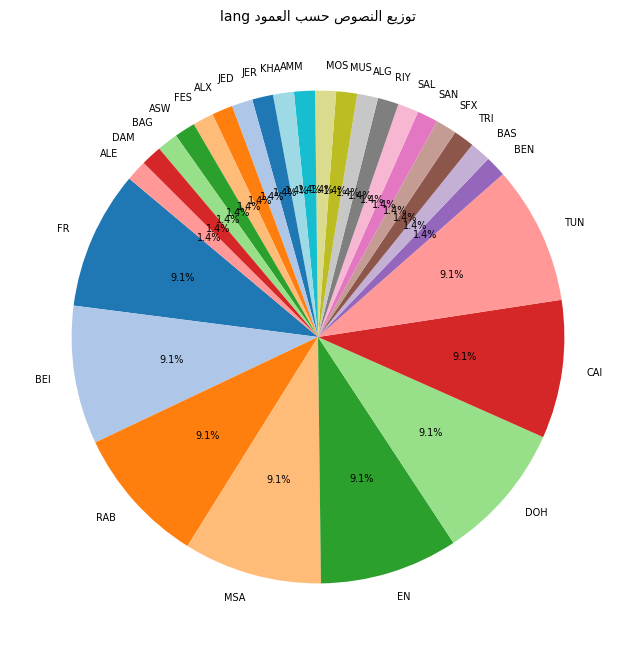

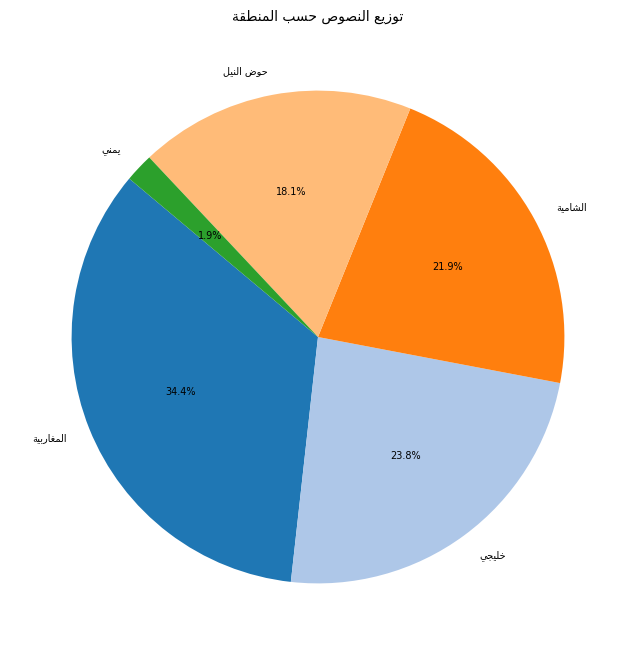

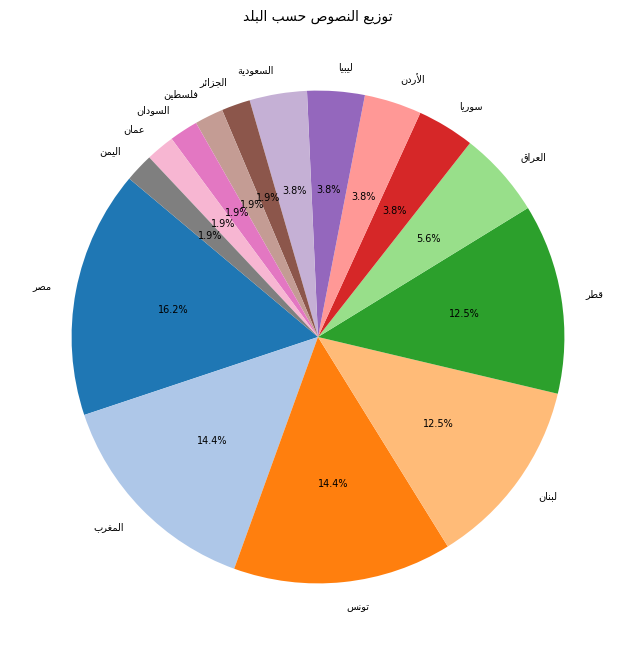

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display

def reshape_arabic_text(text):

    reshaped_text = arabic_reshaper.reshape(text)  # إعادة تشكيل النص
    bidi_text = get_display(reshaped_text)  # عرض النص بشكل صحيح
    return bidi_text

def plot_pie_chart(column, title):

    value_counts = combined_train_df[column].value_counts()

    # إعادة تشكيل النصوص العربية
    labels = [reshape_arabic_text(label) for label in value_counts.index]

    # رسم المخطط الدائري
    plt.figure(figsize=(8, 8))
    plt.pie(
        value_counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.tab20.colors,
        textprops={'fontsize': 7}
    )

    # إضافة العنوان مع إصلاح النصوص العربية
    plt.title(reshape_arabic_text(title), fontsize=10)
    plt.ylabel('')  # إخفاء اسم المحور Y
    plt.show()

# استدعاء الدالة لرسم المخططات الدائرية
plot_pie_chart('lang', 'توزيع النصوص حسب العمود lang')
plot_pie_chart('Region', 'توزيع النصوص حسب المنطقة')
plot_pie_chart('Country', 'توزيع النصوص حسب البلد')


ملاحظتنا

1. توزيع النصوص حسب المدن
- تمثيل متنوع: وجود عدد من المدن مع نسب متفاوتة، مما يشير إلى تنوع المحتوى النصي.
- مدن بارزة: بعض المدن قد تكون أكثر بروزاً، مما يدل على تركز الإنتاج النصي فيها.(DOH,EN,MSA,TUN,CAI,RAB,BEI,FR)


2. توزيع النصوص حسب البلاد
- مصر في الصدارة: تمثل النسبة الأكبر من النصوص، مما يدل على غزارة المحتوى.
- توازن بين الدول: بعض الدول مثل تونس والمغرب تظهر نسبًا متقاربة، مما يعكس تنوعًا ثقافيًا.
- نسب أقل: دول مثل سوريا وليبيا


3. توزيع النصوص حسب المنطقة
- المغاربية الأكثر تمثيلًا: تمثل النسبة الأكبر، مما يدل على تنوع المصادر.
- نسب متقاربة: الخليح والشمالية أيضًا لها تمثيل ملحوظ، مما يعكس تنوع المحتوى من هذه المناطق.
- نسب منخفضة: بعض المناطق تبرز بنسب أقل، مما قد يشير إلى قلة المحتوى المتاح أو التركيز على مواضيع معينة.

## [2.2]

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# التأكد من تحميل الموارد اللازمة من NLTK
nltk.download('punkt')

nltk.download('punkt_tab')  # يُجبر NLTK على تحميل الموارد اللازمة

# اسم العمود الذي يحتوي على النصوص (افترض أنه 'sent')
column_name = 'sent'

# التحقق من وجود العمود النصي
if column_name not in combined_train_df.columns:
    print(f"تأكد من وجود العمود '{column_name}' في DataFrame.")
else:
    # حذف النصوص الفارغة أو المفقودة
    combined_train_df = combined_train_df.dropna(subset=[column_name])
    combined_train_df = combined_train_df[combined_train_df[column_name].str.strip() != ""]

    # التأكد من أن القيم في العمود النصي نصوص
    combined_train_df[column_name] = combined_train_df[column_name].astype(str)

    # تقسيم النصوص إلى كلمات
    combined_train_df['tokens'] = combined_train_df[column_name].apply(word_tokenize)

    # طباعة أول 5 أسطر بعد تقسيم النصوص إلى كلمات
    print("أول 5 أسطر بعد تقسيم النصوص إلى كلمات:")
    print(combined_train_df[[column_name, 'tokens']].head())

    # حساب العدد الكلي للكلمات (Total Tokens) في بيانات التدريب
    total_tokens = combined_train_df['tokens'].apply(len).sum()
    print(f"\nإجمالي عدد الكلمات (Total Tokens): {total_tokens}")

    # حساب عدد الكلمات الفريدة الكلي (Vocabulary Size)
    all_tokens = [token for tokens in combined_train_df['tokens'] for token in tokens]
    unique_tokens = set(all_tokens)
    vocab_size = len(unique_tokens)
    print(f"إجمالي عدد الكلمات الفريدة (Vocabulary Size): {vocab_size}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


أول 5 أسطر بعد تقسيم النصوص إلى كلمات:
                                   sent  \
0  هو هنيك، قدام معلومات السياح بالضبط.   
1      مالي سمعان من قبل بهالعنوان هون.   
2         روح ساوي لبين ما تشوف صيدلية.   
3                          بشقد الفطور؟   
4                     شلون بقدر أساعدك؟   

                                          tokens  
0  [هو, هنيك،, قدام, معلومات, السياح, بالضبط, .]  
1      [مالي, سمعان, من, قبل, بهالعنوان, هون, .]  
2         [روح, ساوي, لبين, ما, تشوف, صيدلية, .]  
3                                [بشقد, الفطور؟]  
4                          [شلون, بقدر, أساعدك؟]  

إجمالي عدد الكلمات (Total Tokens): 22704746
إجمالي عدد الكلمات الفريدة (Vocabulary Size): 832730


## [2.3]

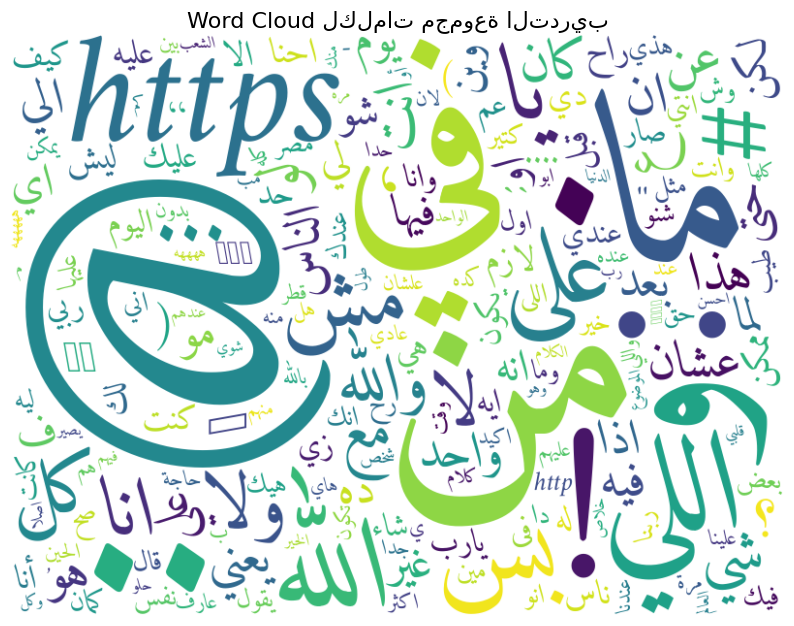

In [ ]:
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from collections import Counter


# حساب التكرار للكلمات
word_counts = Counter(all_tokens)

# إعداد مخطط Word Cloud
wordcloud = WordCloud(
    font_path='/content/Amiri-Italic.ttf',  # حدد مسار خط يدعم اللغة العربية
    width=800,
    height=600,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(word_counts)

# عرض Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # إخفاء المحاور
plt.title("Word Cloud لكلمات مجموعة التدريب", fontsize=16)
plt.show()


نلاحظ من الخرج أن الكلمات التي تظهر بحجم أكبر مثل @ , https ,# وحروف الجر يدل على كثرة تكرارهم أي يوجد الكثير من الروابط أو تغريدات                                                       علامات الاستفهام: مثل "كيف" و"وشو"، تشير إلى استفسارات أو فضول، مما قد يدل على طبيعة الحوار أو النقاش.
الأسماء والأفعال: مثل "أنا"، "على"، و"في"، تشير إلى التركيز على الأفراد والتفاعلات اليومية
استخدام رموز مثل "@" و"#" يدل على وجود تفاعل عبر وسائل التواصل الاجتماعي
الكلمات تتضمن تعابير عفوية وغير رسمية، مما يشير إلى طبيعة غير رسمية للحوار أو النقاش
وجود كلمات مثل "http" و"HTTPS" يدل على وجود محتوى رقمي أو إشارات إلى المواقع الإلكترونية.

## [2.4]

In [ ]:
# استيراد المكتبات
import pandas as pd
import re
from collections import Counter
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

# دالة تقسيم النصوص إلى كلمات
def tokenize_sentence(sentence):

    tokens = re.findall(r'\b\w+\b', sentence.lower())  # تحويل إلى حروف صغيرة وتقسيم
    return tokens

# دالة تجزئة جميع النصوص في عمود محدد إلى كلمات
def tokenize_all_sentences(df, column_words='sent'):

    df[column_words] = df[column_words].fillna('').astype(str)
    all_tokens = df[column_words].apply(tokenize_sentence)
    flattened_tokens = [token for tokens in all_tokens for token in tokens]
    return flattened_tokens



In [ ]:
# تحديد اسم العمود الرئيسي والأعمدة المطلوبة
column_name = 'sent'
group_columns = ['Country', 'Region', 'lang']

# التحقق من وجود الأعمدة المطلوبة
if not all(col in combined_train_df.columns for col in group_columns + [column_name]):
    print("تأكد من وجود الأعمدة المطلوبة في DataFrame.")
else:
    # حذف النصوص الفارغة أو المفقودة
    combined_train_df = combined_train_df.dropna(subset=[column_name])
    combined_train_df = combined_train_df[combined_train_df[column_name].str.strip() != ""]
    print("تم تنظيف البيانات وحذف النصوص الفارغة.")

# إضافة عمود جديد يحتوي على الكلمات المجزأة
combined_train_df['tokens'] = combined_train_df[column_name].apply(tokenize_sentence)
print("تمت إضافة عمود 'tokens' للكلمات المجزأة.")


تم تنظيف البيانات وحذف النصوص الفارغة.
تمت إضافة عمود 'tokens' للكلمات المجزأة.


In [ ]:
# دالة لتحليل النصوص
def analyze_texts(tokens):
    # 1. أكثر 10 كلمات مكررة
    most_common_n = Counter(tokens).most_common(10)

    # 2. الكلمات الأقل تكرارًا (hapaxes)
    hapaxes = [word for word, count in Counter(tokens).items() if count == 1]

    # 3. الكلمات المتكررة
    repeated_words = [word for word, count in Counter(tokens).items() if count > 1]

    # 4. حساب bigrams و trigrams
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigram_finder.apply_freq_filter(2)
    bigrams_freq = bigram_finder.nbest(BigramAssocMeasures().pmi, 10)

    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigram_finder.apply_freq_filter(2)
    trigrams_freq = trigram_finder.nbest(TrigramAssocMeasures().pmi, 10)

    return {
        "most_common": most_common_n,
        "hapaxes": hapaxes,
        "repeated_words": repeated_words,
        "bigrams": bigrams_freq,
        "trigrams": trigrams_freq
    }

print("تم تعريف دالة تحليل النصوص.")


تم تعريف دالة تحليل النصوص.


In [ ]:
# تحليل النصوص حسب اللغة
print("التحليل على مستوى اللغات (lang):\n" + "=" * 40)

for lang, group in combined_train_df.groupby('lang'):
    # جمع الكلمات في هذه اللغة
    tokens = [token for sublist in group['tokens'] for token in sublist]
    result = analyze_texts(tokens)

    # حساب عدد التكرارات للعناصر الأخرى
    bigrams_with_counts = Counter(zip(tokens, tokens[1:]))
    trigrams_with_counts = Counter(zip(tokens, tokens[1:], tokens[2:]))

    # طباعة النتائج بشكل مرتب
    print(f"\nاللغة: {lang}")
    print("-" * 40)
    print("أكثر 10 كلمات مكررة:")
    for word, count in result['most_common']:
        print(f"  - {word}: {count}")

    print("\nالكلمات الأقل تكرارًا (hapaxes):")
    print("  " + ", ".join(result['hapaxes'][:10]))

    print("\nالكلمات المتكررة:")
    for word in result['repeated_words'][:10]:
        print(f"  - {word}: {Counter(tokens)[word]}")

    print("\nأكثر 10 ثنائيات (bigrams):")
    for bigram in result['bigrams']:
        print(f"  - {' '.join(bigram)}: {bigrams_with_counts[bigram]}")

    print("\nأكثر 10 ثلاثيات (trigrams):")
    for trigram in result['trigrams']:
        print(f"  - {' '.join(trigram)}: {trigrams_with_counts[trigram]}")

    print("=" * 40)


التحليل على مستوى اللغات (lang):

اللغة: ALE
----------------------------------------
أكثر 10 كلمات مكررة:
  - إذا: 250
  - سمحت: 207
  - بدي: 164
  - ما: 110
  - من: 94
  - خرج: 93
  - رح: 92
  - في: 87
  - هاد: 85
  - ع: 82

الكلمات الأقل تكرارًا (hapaxes):
  معلومات, السياح, سمعان, بهالعنوان, كريمة, بقهوتك, تصرفلي, الميتين, الكافيه, اطفال

الكلمات المتكررة:
  - هو: 46
  - هنيك: 13
  - قدام: 5
  - بالضبط: 4
  - مالي: 8
  - من: 94
  - قبل: 10
  - هون: 63
  - روح: 9
  - ساوي: 8

أكثر 10 ثنائيات (bigrams):
  - التصريح الجمركي: 2
  - الحي الصيني: 2
  - بالتوقيت المحلي: 2
  - بشتغل بشركة: 2
  - حديقة الحيوانات: 2
  - عطلة وطنية: 2
  - فنادق رخيصة: 2
  - لاس فيغاس: 2
  - لوس أنجلس: 2
  - الضريبة وكلفة: 2

أكثر 10 ثلاثيات (trigrams):
  - الضريبة وكلفة الخدمة: 2
  - القطار لحتى أوصل: 2
  - أدق مكالمة خارجية: 2
  - انسرقت مني شنتايتي: 2
  - ينعن ينعن ينعن: 2
  - عند تالت مفرق: 2
  - الطرف تبعك عالخط: 2
  - ايه بي سي: 2
  - الخطوط الجوية اليابانية: 2
  - بطاقتين درجة تانية: 2

اللغة: ALG
-----

In [ ]:
# تحليل النصوص حسب المنطقة
print("التحليل على مستوى المناطق (Region):\n" + "=" * 40)

for region, group in combined_train_df.groupby('Region'):
    # جمع الكلمات في هذه المنطقة
    tokens = [token for sublist in group['tokens'] for token in sublist]
    result = analyze_texts(tokens)

    # حساب عدد التكرارات للعناصر الأخرى
    bigrams_with_counts = Counter(zip(tokens, tokens[1:]))
    trigrams_with_counts = Counter(zip(tokens, tokens[1:], tokens[2:]))

    # طباعة النتائج بشكل مرتب
    print(f"\nالمنطقة: {region}")
    print("-" * 40)
    print("أكثر 10 كلمات مكررة:")
    for word, count in result['most_common']:
        print(f"  - {word}: {count}")

    print("\nالكلمات الأقل تكرارًا (hapaxes):")
    print("  " + ", ".join(result['hapaxes'][:10]))

    print("\nالكلمات المتكررة:")
    for word in result['repeated_words'][:10]:
        print(f"  - {word}: {Counter(tokens)[word]}")

    print("\nأكثر 10 ثنائيات (bigrams):")
    for bigram in result['bigrams']:
        print(f"  - {' '.join(bigram)}: {bigrams_with_counts[bigram]}")

    print("\nأكثر 10 ثلاثيات (trigrams):")
    for trigram in result['trigrams']:
        print(f"  - {' '.join(trigram)}: {trigrams_with_counts[trigram]}")

    print("=" * 40)


التحليل على مستوى المناطق (Region):

المنطقة: الشامية
----------------------------------------
أكثر 10 كلمات مكررة:
  - بدي: 1730
  - من: 1439
  - ما: 1215
  - في: 1202
  - بتريد: 1074
  - سمحت: 984
  - رح: 936
  - و: 889
  - إذا: 860
  - لو: 795

الكلمات الأقل تكرارًا (hapaxes):
  سمعان, المفرد, إثبات, صديقك, مصممة, أتساعد, سآل, عيف, هبمرغر, عالعملية

الكلمات المتكررة:
  - هو: 125
  - هنيك: 28
  - قدام: 31
  - معلومات: 9
  - السياح: 5
  - بالضبط: 4
  - مالي: 10
  - من: 1439
  - قبل: 97
  - بهالعنوان: 2

أكثر 10 ثنائيات (bigrams):
  - الاستحقاق الثقافي: 2
  - الدين المسيحي: 2
  - انسى الفتحة: 2
  - بساوث ماين: 2
  - بهالمركز التجاري: 2
  - بينسوا يوقعوا: 2
  - تعطيك لمحة: 2
  - دفعة مسبقة: 2
  - راكيتات للاجار: 2
  - ستايت بيلدينج: 2

أكثر 10 ثلاثيات (trigrams):
  - بالمايل بيشير للتغييرات: 2
  - لحسن ضيافتك الصدق: 2
  - أليل السعرات الحرارية: 2
  - بدهم يضلو لحالهم: 2
  - سيداتي وسادتي برحلتنا: 2
  - الأجانب يستخدموا الكتب: 2
  - حقق أعظم نجاح: 2
  - للفنانين والعلماء المتميزين: 2
  -

In [ ]:
# تحليل النصوص حسب البلد
print("التحليل على مستوى البلدان (Country):\n" + "=" * 40)

for country, group in combined_train_df.groupby('Country'):
    # جمع الكلمات في هذه البلد
    tokens = [token for sublist in group['tokens'] for token in sublist]
    result = analyze_texts(tokens)

    # حساب عدد التكرارات للعناصر الأخرى
    bigrams_with_counts = Counter(zip(tokens, tokens[1:]))
    trigrams_with_counts = Counter(zip(tokens, tokens[1:], tokens[2:]))

    # طباعة النتائج بشكل مرتب
    print(f"\nالبلد: {country}")
    print("-" * 40)
    print("أكثر 10 كلمات مكررة:")
    for word, count in result['most_common']:
        print(f"  - {word}: {count}")

    print("\nالكلمات الأقل تكرارًا (hapaxes):")
    print("  " + ", ".join(result['hapaxes'][:10]))

    print("\nالكلمات المتكررة:")
    for word in result['repeated_words'][:10]:
        print(f"  - {word}: {Counter(tokens)[word]}")

    print("\nأكثر 10 ثنائيات (bigrams):")
    for bigram in result['bigrams']:
        print(f"  - {' '.join(bigram)}: {bigrams_with_counts[bigram]}")

    print("\nأكثر 10 ثلاثيات (trigrams):")
    for trigram in result['trigrams']:
        print(f"  - {' '.join(trigram)}: {trigrams_with_counts[trigram]}")

    print("=" * 40)


التحليل على مستوى البلدان (Country):

البلد: الأردن
----------------------------------------
أكثر 10 كلمات مكررة:
  - لو: 445
  - سمحت: 433
  - من: 301
  - بدي: 297
  - على: 290
  - هاد: 281
  - في: 224
  - ما: 202
  - ممكن: 190
  - أنا: 177

الكلمات الأقل تكرارًا (hapaxes):
  الكريمة, تصرفلي, كلمني, التعامل, كندرة, الأصابع, تستخدمها, فردي, مموج, خمرة

الكلمات المتكررة:
  - هيو: 10
  - هناك: 48
  - بالزبط: 11
  - مقابل: 4
  - مكتب: 12
  - المعلومات: 4
  - السياحية: 7
  - أنا: 177
  - ما: 202
  - سمعت: 2

أكثر 10 ثنائيات (bigrams):
  - ألقي نظرة: 2
  - أمريكية أصلية: 2
  - الترحيب بالشامبانيا: 2
  - التصوير مفتاحين: 2
  - التنانير القصيرة: 2
  - الجزء المكتوب: 2
  - الساحل الشرقي: 2
  - الصيفية بجامعة: 2
  - الطعم غريب: 2
  - المدرسة الصيفية: 2

أكثر 10 ثلاثيات (trigrams):
  - المدرسة الصيفية بجامعة: 2
  - تزبط المراية الخلفية: 2
  - تكبس كبسة التصوير: 2
  - كبسة التصوير مفتاحين: 2
  - الموجودة موظفين المبيعات: 2
  - الموردين للكمبيوترات الصغيرة: 2
  - تاريخ انتهاء الصلاحية: 2
  - الصيف

أغلب التكرارات في النصوص عبارة عن كلمات للاستفسار والطلب وأن طبيعة الحوار استفساري وتفاعلي.


## [2.5]

In [ ]:
import pandas as pd
from collections import Counter

def find_unique_words(df, country_col, region_col, dialect_col, text_col, threshold=2):

    # إنشاء قاموس لتخزين التكرار لكل لهجة
    unique_words = {}

    # تجميع البيانات حسب Country وRegion وlang
    grouped_df = df.groupby([country_col, region_col, dialect_col])[text_col].apply(lambda x: ' '.join(x)).reset_index()

    for _, row in grouped_df.iterrows():
        country = row[country_col]
        region = row[region_col]
        dialect = row[dialect_col]
        text = row[text_col]

        # تقسيم النصوص إلى كلمات
        tokens = text.split()  # يمكنك استخدام word_tokenize هنا

        # حساب التكرار لكل كلمة في النصوص
        if dialect not in unique_words:
            unique_words[dialect] = Counter()

        unique_words[dialect].update(tokens)

    # إيجاد الكلمات المميزة
    dialects = unique_words.keys()
    final_unique_words = {}

    for dialect, counter in unique_words.items():
        # حساب الكلمات المميزة
        final_unique_words[dialect] = {
            word: count for word, count in counter.items()
            if count > threshold and all(word not in unique_words[other_dialect] for other_dialect in dialects if other_dialect != dialect)
        }

        # ترتيب الكلمات المميزة بحسب تكرارها
        final_unique_words[dialect] = sorted(final_unique_words[dialect].items(), key=lambda x: x[1], reverse=True)

    return final_unique_words

def print_unique_words(unique_words_dict, title):

    print(f"\n{title}\n" + "=" * 50)
    for key, words in unique_words_dict.items():
        print(f"\n- {key}:")
        if words:
            for word, count in words:
                print(f"  - {word}: {count}")
        else:
            print("  لا توجد كلمات مميزة.")


In [ ]:
# تطبيق الدالة على المستويات الثلاثة
train_unique_by_lang = find_unique_words(combined_train_df, 'Country', 'Region', 'lang', 'sent', threshold=2)

# طباعة النتائج على مستوى اللهجة
print_unique_words(train_unique_by_lang, "الكلمات المميزة في مجموعة التدريب حسب اللهجة")


الكلمات المميزة في مجموعة التدريب حسب اللهجة

- AMM:
  - إشي: 6
  - أشيك: 5
  - وإلا: 5
  - إحكيلي: 4
  - حابيين: 3
  - اأمن: 3
  - إشي،: 3

- SAL:
  - توخذ: 3
  - افرجيك: 3

- ALG:
  - تع: 69
  - نصيب: 13
  - صحا.: 11
  - لوكان: 11
  - لهاذ: 9
  - عشرون: 8
  - تاع: 6
  - دوكا: 6
  - ثلاثون: 6
  - وعلاش: 6
  - لهيك.: 6
  - هاذا،: 6
  - تسعون: 6
  - ويدا: 5
  - اثنان: 5
  - تصيب: 5
  - دوكا؟: 5
  - المعذرة.: 5
  - فالحين.: 5
  - نسحق: 4
  - آما: 4
  - دوكا.: 4
  - نحوس: 4
  - بالاك: 4
  - خمسمئة: 4
  - المعذرة،: 4
  - لالا.: 3
  - ممبعد: 3
  - صبت: 3
  - شابين: 3
  - واحدأوخر؟: 3
  - الغاشي: 3
  - اللعنة،: 3
  - الدراهم: 3
  - مونطو: 3
  - ارواح: 3
  - اتكسل: 3
  - دياولك: 3
  - حاب؟: 3
  - صحا: 3

- JED:
  - دحين.: 14
  - دحين: 10
  - باللهي: 9
  - يبالي: 8
  - أممم،: 8
  - يمديك: 7
  - حاخذ: 7
  - الجأي.: 6
  - أيوا.: 5
  - لليأبان؟: 5
  - سيدا: 4
  - يمديني: 4
  - بأين: 4
  - دحين؟: 4
  - أيت: 4
  - اليأبان: 4
  - تباني: 3
  - تباها؟: 3
  - حوريك: 3
  - دحين،: 3
  - معأيا: 3
  - لهن

In [ ]:

# تطبيق الدالة على مستوى المنطقة
train_unique_by_region = find_unique_words(combined_train_df, 'Country', 'Region', 'lang', 'sent', threshold=2)

# طباعة النتائج على مستوى المنطقة
print_unique_words(train_unique_by_region, "الكلمات المميزة في مجموعة التدريب حسب المنطقة")



الكلمات المميزة في مجموعة التدريب حسب المنطقة

- AMM:
  - إشي: 6
  - أشيك: 5
  - وإلا: 5
  - إحكيلي: 4
  - حابيين: 3
  - اأمن: 3
  - إشي،: 3

- SAL:
  - توخذ: 3
  - افرجيك: 3

- ALG:
  - تع: 69
  - نصيب: 13
  - صحا.: 11
  - لوكان: 11
  - لهاذ: 9
  - عشرون: 8
  - تاع: 6
  - دوكا: 6
  - ثلاثون: 6
  - وعلاش: 6
  - لهيك.: 6
  - هاذا،: 6
  - تسعون: 6
  - ويدا: 5
  - اثنان: 5
  - تصيب: 5
  - دوكا؟: 5
  - المعذرة.: 5
  - فالحين.: 5
  - نسحق: 4
  - آما: 4
  - دوكا.: 4
  - نحوس: 4
  - بالاك: 4
  - خمسمئة: 4
  - المعذرة،: 4
  - لالا.: 3
  - ممبعد: 3
  - صبت: 3
  - شابين: 3
  - واحدأوخر؟: 3
  - الغاشي: 3
  - اللعنة،: 3
  - الدراهم: 3
  - مونطو: 3
  - ارواح: 3
  - اتكسل: 3
  - دياولك: 3
  - حاب؟: 3
  - صحا: 3

- JED:
  - دحين.: 14
  - دحين: 10
  - باللهي: 9
  - يبالي: 8
  - أممم،: 8
  - يمديك: 7
  - حاخذ: 7
  - الجأي.: 6
  - أيوا.: 5
  - لليأبان؟: 5
  - سيدا: 4
  - يمديني: 4
  - بأين: 4
  - دحين؟: 4
  - أيت: 4
  - اليأبان: 4
  - تباني: 3
  - تباها؟: 3
  - حوريك: 3
  - دحين،: 3
  - معأيا: 3
  - له

In [ ]:
# تطبيق الدالة على مستوى البلد
train_unique_by_country = find_unique_words(combined_train_df, 'Country', 'Region', 'lang', 'sent', threshold=2)

# طباعة النتائج على مستوى البلد
print_unique_words(train_unique_by_country, "الكلمات المميزة في مجموعة التدريب حسب البلد")



الكلمات المميزة في مجموعة التدريب حسب البلد

- AMM:
  - إشي: 6
  - أشيك: 5
  - وإلا: 5
  - إحكيلي: 4
  - حابيين: 3
  - اأمن: 3
  - إشي،: 3

- SAL:
  - توخذ: 3
  - افرجيك: 3

- ALG:
  - تع: 69
  - نصيب: 13
  - صحا.: 11
  - لوكان: 11
  - لهاذ: 9
  - عشرون: 8
  - تاع: 6
  - دوكا: 6
  - ثلاثون: 6
  - وعلاش: 6
  - لهيك.: 6
  - هاذا،: 6
  - تسعون: 6
  - ويدا: 5
  - اثنان: 5
  - تصيب: 5
  - دوكا؟: 5
  - المعذرة.: 5
  - فالحين.: 5
  - نسحق: 4
  - آما: 4
  - دوكا.: 4
  - نحوس: 4
  - بالاك: 4
  - خمسمئة: 4
  - المعذرة،: 4
  - لالا.: 3
  - ممبعد: 3
  - صبت: 3
  - شابين: 3
  - واحدأوخر؟: 3
  - الغاشي: 3
  - اللعنة،: 3
  - الدراهم: 3
  - مونطو: 3
  - ارواح: 3
  - اتكسل: 3
  - دياولك: 3
  - حاب؟: 3
  - صحا: 3

- JED:
  - دحين.: 14
  - دحين: 10
  - باللهي: 9
  - يبالي: 8
  - أممم،: 8
  - يمديك: 7
  - حاخذ: 7
  - الجأي.: 6
  - أيوا.: 5
  - لليأبان؟: 5
  - سيدا: 4
  - يمديني: 4
  - بأين: 4
  - دحين؟: 4
  - أيت: 4
  - اليأبان: 4
  - تباني: 3
  - تباها؟: 3
  - حوريك: 3
  - دحين،: 3
  - معأيا: 3
  - لهنا

In [ ]:
print(combined_train_df.columns)


Index(['sentID.BTEC', 'split', 'lang', 'sent', 'Abbriviation', 'Region',
       'Country', 'tokens'],
      dtype='object')


## [2.6]

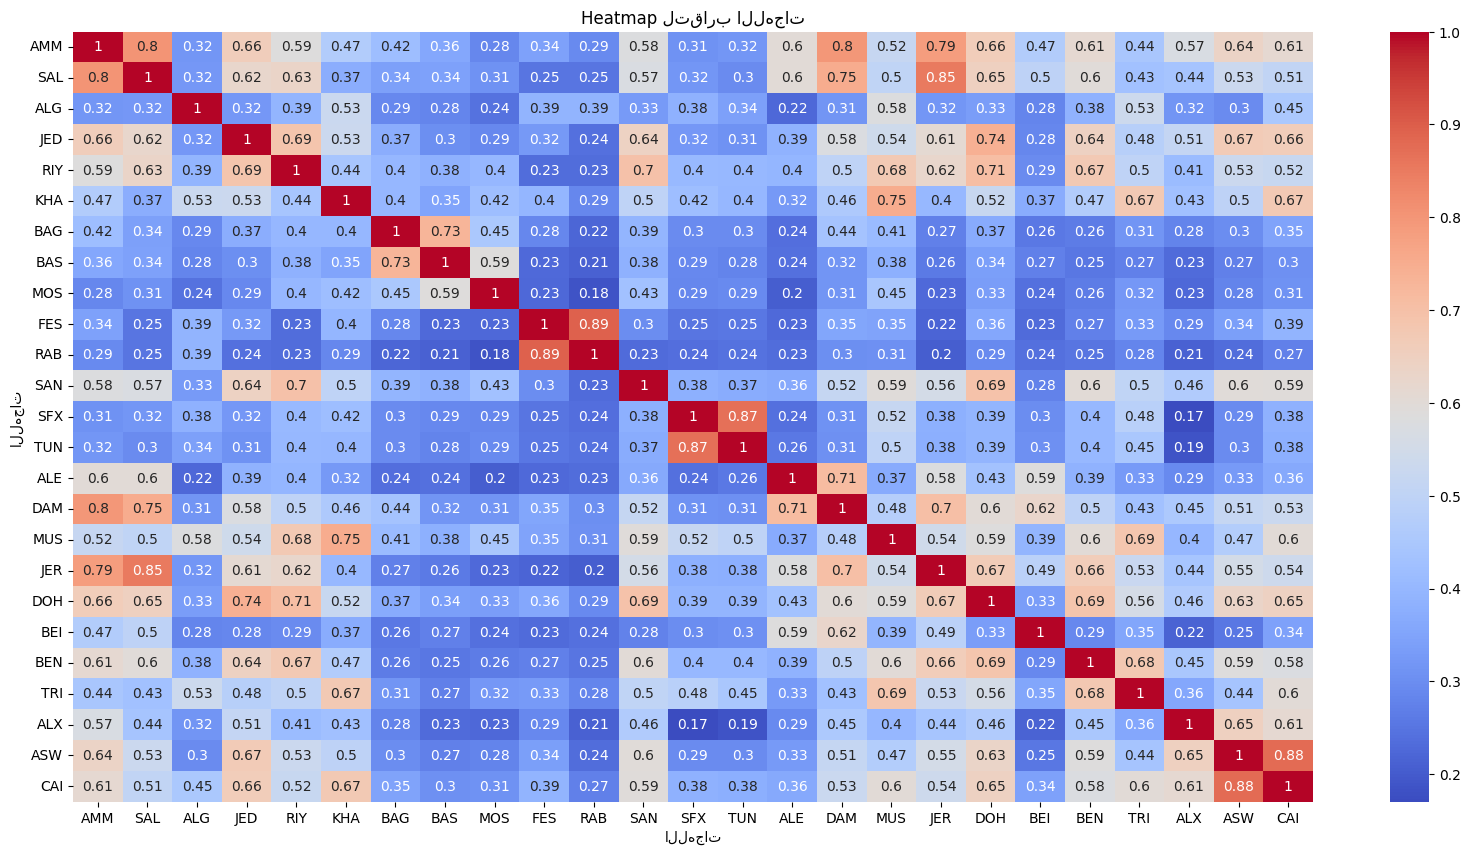

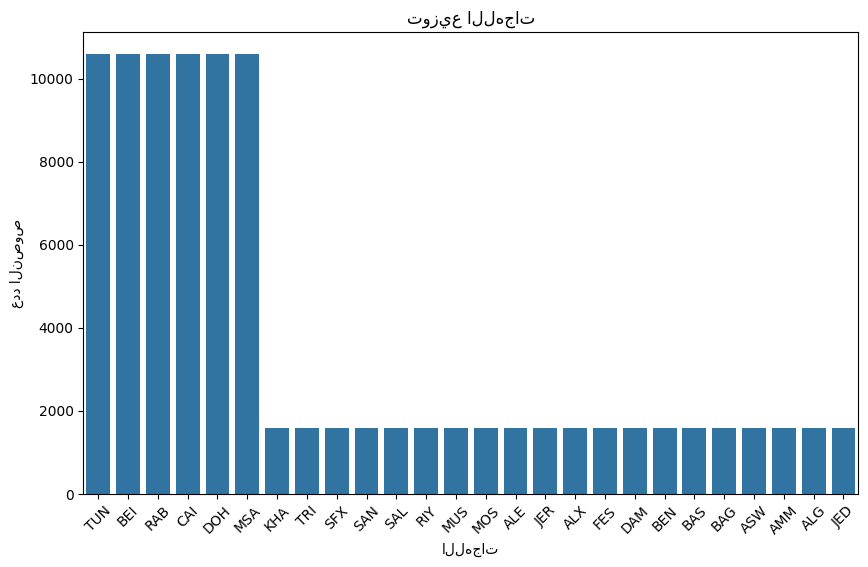

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# 1. تحضير البيانات
grouped_df = combined_train_df.groupby(['Country', 'Region', 'lang'])['sent'].apply(lambda x: ' '.join(x)).reset_index()

# 2. حساب تكرار الكلمات
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(grouped_df['sent'])

# 3. حساب التشابه (مصفوفة التشابه)
similarity_matrix = cosine_similarity(X)

# تحويل مصفوفة التشابه إلى DataFrame لتحليلها
similarity_df = pd.DataFrame(similarity_matrix, index=grouped_df['lang'], columns=grouped_df['lang'])

# 4. إنشاء Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm')
plt.title('Heatmap لتقارب اللهجات')
plt.xlabel('اللهجات')
plt.ylabel('اللهجات')
plt.show()

# 5. طرق بصرية أخرى (مثال على مخطط شريطي)
summary_counts = combined_train_df['lang'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_counts.index, y=summary_counts.values)
plt.title('توزيع اللهجات')
plt.xlabel('اللهجات')
plt.ylabel('عدد النصوص')
plt.xticks(rotation=45)
plt.show()

Heatmap
تحليل الارتباط:
يُظهر الارتباطات بين المتغيرات المختلفة، حيث تتراوح القيم بين 0 و1، مما يعني قوة العلاقة. الألوان الداكنة تشير إلى ارتباطات قوية، بينما الألوان الفاتحة تدل على ارتباطات ضعيفة.
يمكن أن تشير القيم العالية (مثل 0.9) إلى وجود علاقة قوية بين متغيرين، مما قد يعني أن أحدهما يؤثر بشكل كبير على الآخر.

Histogram
توزيع التكرارات:
يظهر الرسم البياني تكرارات مختلفة للفئات، حيث تبرز بعض الفئات بشكل ملحوظ (مثل "BEI" أو "DOH") بتكرارات عالية جدًا مقارنة بالفئات الأخرى.
هذا يشير إلى وجود تباين كبير في التوزيع، حيث يمكن أن تكون بعض الفئات أكثر شيوعًا أو أهمية في البيانات.

## [2.7]

word2vec تحميل نموذج

In [ ]:
# استيراد المكتبات اللازمة
import requests
import zipfile
import os

# رابط التحميل
url = "https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip"

# اسم الملف بعد التحميل
output_file = "word2vec.zip"

# تحميل الملف
print("Downloading the file...")
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(output_file, "wb") as f:
        f.write(response.content)
    print("Download completed!")
else:
    print(f"Failed to download. Status code: {response.status_code}")

# فك الضغط إذا كان مضغوطًا
if zipfile.is_zipfile(output_file):
    print("Extracting the zip file...")
    with zipfile.ZipFile(output_file, 'r') as zip_ref:
        zip_ref.extractall("word2vec")
    print("Extraction completed!")

# التأكد من المحتوى
print("Contents:")
print(os.listdir("word2vec"))


Download completed!
Extracting the zip file...
Extraction completed!
Contents:
['full_uni_cbow_300_twitter.mdl.wv.vectors.npy', 'full_uni_cbow_300_twitter.mdl', 'full_uni_cbow_300_twitter.mdl.trainables.syn1neg.npy']


In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import gc

# استخراج الكلمات الفريدة من بيانات التدريب
train_tokens = set(all_tokens)  # استخدمنا `all_tokens` التي تم توليدها سابقاً
total_words = len(train_tokens)

# 1. تحميل نموذج Word2Vec
word2vec_path = "/content/word2vec/full_uni_cbow_300_twitter.mdl"
word2vec_model = KeyedVectors.load(word2vec_path)
# Access the KeyedVectors instance for embeddings using .wv
word2vec_vocab = set(word2vec_model.wv.key_to_index.keys())

# تحرير الذاكرة
del word2vec_model  # Changed 'model' to 'word2vec_model'
gc.collect()

# 4. حساب نسبة الكلمات خارج المفردات OOV لكل نموذج
def calculate_oov_rate(tokens, vocab):
    oov_tokens = [token for token in tokens if token not in vocab]
    oov_rate = len(oov_tokens) / len(tokens) * 100
    return oov_rate, oov_tokens

# حساب النسبة لكل نموذج
word2vec_oov_rate, word2vec_oov_tokens = calculate_oov_rate(train_tokens, word2vec_vocab)
print(f"Word2Vec OOV Rate: {word2vec_oov_rate:.2f}% ({len(word2vec_oov_tokens)} كلمات خارج المفردات)")

Word2Vec OOV Rate: 66.29% (551948 كلمات خارج المفردات)


fasttext تحميل نموذج

In [ ]:
pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296232 sha256=0eecc0dbd61c4bf48bfc2f7d9767eff791805fef3cfb6ac1ebcc4c5ca76e79c0
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
# تحميل نموذج FastText من الرابط المباشر
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz -P /content/fasttext/


--2025-01-13 08:23:21--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.108, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4500982519 (4.2G) [application/octet-stream]
Saving to: ‘/content/fasttext/cc.ar.300.bin.gz’

cc.ar.300.bin.gz    100%[===================>]   4.19G   169MB/s    in 92s     

2025-01-13 08:24:53 (46.5 MB/s) - ‘/content/fasttext/cc.ar.300.bin.gz’ saved [4500982519/4500982519]



In [ ]:
# فك ضغط الملف الذي تم تنزيله
!gunzip /content/fasttext/cc.ar.300.bin.gz


In [ ]:
from gensim.models import KeyedVectors
import fasttext
import numpy as np
import gc

# استخراج الكلمات الفريدة من بيانات التدريب
train_tokens = set(all_tokens)  # استخدمنا `all_tokens` التي تم توليدها سابقاً
total_words = len(train_tokens)



In [ ]:
import fasttext
import gc
# 2. تحميل نموذج FastText
fasttext_path = "/content/fasttext/cc.ar.300.bin"
fasttext_model = fasttext.load_model(fasttext_path)
fasttext_vocab = set(fasttext_model.get_words())

# تحرير الذاكرة
del fasttext_model
gc.collect()



132

In [ ]:

# 4. حساب نسبة الكلمات خارج المفردات OOV لكل نموذج
def calculate_oov_rate(tokens, vocab):
    oov_tokens = [token for token in tokens if token not in vocab]
    oov_rate = len(oov_tokens) / len(tokens) * 100
    return oov_rate, oov_tokens

# حساب النسبة لكل نموذج

fasttext_oov_rate, fasttext_oov_tokens = calculate_oov_rate(train_tokens, fasttext_vocab)


# 5. طباعة النتائج
print(f"FastText OOV Rate: {fasttext_oov_rate:.2f}% ({len(fasttext_oov_tokens)} كلمات خارج المفردات)")


FastText OOV Rate: 66.91% (557166 كلمات خارج المفردات)


glove تحميل نموذج

In [ ]:
import os
import zipfile
import requests

# الرابط إلى ملف GloVe
glove_url = "https://nlp.stanford.edu/data/glove.twitter.27B.zip"
glove_zip_path = "/content/glove.twitter.27B.zip"  # المسار المحلي لحفظ الملف

# تحميل الملف
response = requests.get(glove_url)
with open(glove_zip_path, "wb") as f:
    f.write(response.content)

# فك ضغط الملف
with zipfile.ZipFile(glove_zip_path, "r") as zip_ref:
    zip_ref.extractall("/content/glove_models")  # استخراج الملفات هنا

print("تم تحميل وفك ضغط GloVe.")


تم تحميل وفك ضغط GloVe.


In [ ]:
def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            split_line = line.strip().split()
            word = split_line[0]
            vector = [float(val) for val in split_line[1:]]
            glove_model[word] = vector
    return glove_model

# تحميل نموذج GloVe
glove_file_path = "/content/glove_models/glove.twitter.27B.200d.txt"  # اختر الملف المناسب
glove_model = load_glove_model(glove_file_path)

print("تم تحميل نموذج GloVe.")


In [ ]:
import gc

# تحرير الذاكرة
del glove_model
gc.collect()


0

In [ ]:
# استخراج الكلمات الفريدة من بيانات التدريب
train_tokens = set(all_tokens)  # استخدمنا `all_tokens` التي تم توليدها سابقاً
total_words = len(train_tokens)

# 4. حساب نسبة الكلمات خارج المفردات OOV لكل نموذج
def calculate_oov_rate(tokens, vocab):
    oov_tokens = [token for token in tokens if token not in vocab]
    oov_rate = len(oov_tokens) / len(tokens) * 100
    return oov_rate, oov_tokens


glove_oov_rate, glove_oov_tokens = calculate_oov_rate(train_tokens, glove_model)
print(f"GloVe OOV Rate: {glove_oov_rate:.2f}% ({len(glove_oov_tokens)} كلمات خارج المفردات)")


NameError: name 'all_tokens' is not defined

In [ ]:
import gc
def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            split_line = line.strip().split()
            word = split_line[0]
            vector = [float(val) for val in split_line[1:]]
            glove_model[word] = vector
    return glove_model

# تحميل نموذج GloVe
glove_file_path = "/content/glove_models/glove.twitter.27B.200d.txt"  # اختر الملف المناسب
glove_model = load_glove_model(glove_file_path)

print("تم تحميل نموذج GloVe.")


# تحرير الذاكرة
del glove_model
gc.collect()

# استخراج الكلمات الفريدة من بيانات التدريب
train_tokens = set(all_tokens)  # استخدمنا `all_tokens` التي تم توليدها سابقاً
total_words = len(train_tokens)

# 4. حساب نسبة الكلمات خارج المفردات OOV لكل نموذج
def calculate_oov_rate(tokens, vocab):
    oov_tokens = [token for token in tokens if token not in vocab]
    oov_rate = len(oov_tokens) / len(tokens) * 100
    return oov_rate, oov_tokens


glove_oov_rate, glove_oov_tokens = calculate_oov_rate(train_tokens, glove_model)
print(f"GloVe OOV Rate: {glove_oov_rate:.2f}% ({len(glove_oov_tokens)} كلمات خارج المفردات)")

# If you need to free up memory after this calculation, you can delete glove_model here:
# import gc
# del glove_model
# gc.collect()

In [ ]:
from gensim.models import KeyedVectors
import fasttext
import numpy as np
import gc

# استخراج الكلمات الفريدة من بيانات التدريب
train_tokens = set(all_tokens)  # استخدمنا `all_tokens` التي تم توليدها سابقاً
total_words = len(train_tokens)

# 1. تحميل نموذج Word2Vec
word2vec_path = "/content/word2vec/full_uni_cbow_300_twitter.mdl"
word2vec_model = KeyedVectors.load(word2vec_path)
word2vec_vocab = set(word2vec_model.key_to_index.keys())


# تحرير الذاكرة
del word2vec_model
gc.collect()

# 2. تحميل نموذج FastText
fasttext_path = "/content/fasttext/cc.ar.300.bin"
fasttext_model = fasttext.load_model(fasttext_path)
fasttext_vocab = set(fasttext_model.get_words())

# تحرير الذاكرة
del fasttext_model
gc.collect()

# 3. تحميل نموذج GloVe
def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            split_line = line.strip().split()
            word = split_line[0]
            vector = [float(val) for val in split_line[1:]]
            glove_model[word] = vector
    return glove_model

glove_file_path = "/content/glove_models/glove.twitter.27B.200d.txt"
glove_model = load_glove_model(glove_file_path)
glove_vocab = set(glove_model.keys())

# تحرير الذاكرة
del glove_model
gc.collect()

# 4. حساب نسبة الكلمات خارج المفردات OOV لكل نموذج
def calculate_oov_rate(tokens, vocab):
    oov_tokens = [token for token in tokens if token not in vocab]
    oov_rate = len(oov_tokens) / len(tokens) * 100
    return oov_rate, oov_tokens

# حساب النسبة لكل نموذج
word2vec_oov_rate, word2vec_oov_tokens = calculate_oov_rate(train_tokens, word2vec_vocab)
fasttext_oov_rate, fasttext_oov_tokens = calculate_oov_rate(train_tokens, fasttext_vocab)
glove_oov_rate, glove_oov_tokens = calculate_oov_rate(train_tokens, glove_vocab)

# 5. طباعة النتائج
print(f"Word2Vec OOV Rate: {word2vec_oov_rate:.2f}% ({len(word2vec_oov_tokens)} كلمات خارج المفردات)")
print(f"FastText OOV Rate: {fasttext_oov_rate:.2f}% ({len(fasttext_oov_tokens)} كلمات خارج المفردات)")
print(f"GloVe OOV Rate: {glove_oov_rate:.2f}% ({len(glove_oov_tokens)} كلمات خارج المفردات)")

# 6. تسجيل الملاحظات
print("\nالملاحظات:")
if glove_oov_rate > fasttext_oov_rate and glove_oov_rate > word2vec_oov_rate:
    print("- نموذج GloVe لديه أقل تغطية مقارنة بالنماذج الأخرى.")
if fasttext_oov_rate < glove_oov_rate and fasttext_oov_rate < word2vec_oov_rate:
    print("- نموذج FastText هو الأكثر تغطية، حيث يقلل من الكلمات خارج المفردات بفضل تمثيل الأحرف.")
if word2vec_oov_rate < glove_oov_rate and word2vec_oov_rate > fasttext_oov_rate:
    print("- نموذج Word2Vec يقدم تغطية أفضل من GloVe ولكنه أقل من FastText.")


NameError: name 'all_tokens' is not defined

# مهمة 03 : تنظيف وتوحيد النص

normalization and cleaning Text

## [3.1]


In [ ]:
import pandas as pd
import re
# تابع إزالة علامات الترقيم
def remove_punctuation(text):
    """ يزيل علامات الترقيم من النص """
    return re.sub(r'[^\w\s]', '', text)

# قراءة البيانات من الملف
combined_train_df = '/content/combined/new_combined_train_with_dialects.csv'
df = pd.read_csv(combined_train_df, encoding='utf-8-sig', low_memory=False)

# اختيار 5 عينات عشوائية
random_samples = df.sample(n=5)

# تطبيق التابع على كل عينة باستخدام عمود 'sent'
random_samples['cleaned_text'] = random_samples['sent'].apply(remove_punctuation)

# طباعة العينات المعدلة
print(random_samples[['sent', 'cleaned_text']])

                                                      sent  \
621735   @Fahd95LY جو شين أعفن موسم انتفرج عليه من ايام...   
1426491        @ADEL_AL_FARHAN تمللنا ياخوي لازم نرتاح شوي   
820605   سلام ع الساكتين، الخايفين، المحتاجين للأنس و ا...   
197573   @alhellani_iq طبعا اني على طول اكولها بلدي الث...   
811303   لاشفت البادي يغرد والا الباديه\nأضغـط فولو لاش...   

                                              cleaned_text  
621735   Fahd95LY جو شين أعفن موسم انتفرج عليه من ايام ...  
1426491         ADEL_AL_FARHAN تمللنا ياخوي لازم نرتاح شوي  
820605   سلام ع الساكتين الخايفين المحتاجين للأنس و الد...  
197573   alhellani_iq طبعا اني على طول اكولها بلدي الثا...  
811303   لاشفت البادي يغرد والا الباديه\nأضغـط فولو لاش...  


In [ ]:
import pandas as pd
import re

def remove_extra_spaces(text):
    """ يزيل المسافات الزائدة بين الكلمات """
    return re.sub(r'\s+', ' ', text).strip()

# قراءة البيانات من الملف
combined_train_df = '/content/combined/new_combined_train_with_dialects.csv'
df = pd.read_csv(combined_train_df, encoding='utf-8-sig', low_memory=False)

# اختيار 5 عينات عشوائية
random_samples = df.sample(n=5)

# تطبيق التابع على كل عينة باستخدام عمود 'sent'
random_samples['cleaned_text'] = random_samples['sent'].apply(remove_extra_spaces)

# طباعة العينات المعدلة
print(random_samples[['sent', 'cleaned_text']])

                                                      sent  \
1269811  ده اهلى جده .. احسن فكركم يروح بعيد ...!!!! ht...   
553392   @Dhahi_Khalfan معك خمسين الف واحد بالشمال هههه...   
1058968  @BobAB7 @hussainfallah94 الفيس كان يعوم اصلا م...   
1123890  الله يخليكي ياتاج راسي ❤🌷 https://t.co/M04O38XVyx   
186850         @shnazzall ههههه ايش صباح شكي الهموم هاد ؟؟   

                                              cleaned_text  
1269811  ده اهلى جده .. احسن فكركم يروح بعيد ...!!!! ht...  
553392   @Dhahi_Khalfan معك خمسين الف واحد بالشمال هههه...  
1058968  @BobAB7 @hussainfallah94 الفيس كان يعوم اصلا م...  
1123890  الله يخليكي ياتاج راسي ❤🌷 https://t.co/M04O38XVyx  
186850         @shnazzall ههههه ايش صباح شكي الهموم هاد ؟؟  


In [ ]:
import pandas as pd
import re

def remove_non_arabic(text):
    """ يزيل الكلمات غير العربية """
    return re.sub(r'[^ء-ي\s]', '', text)

combined_train_df = '/content/combined/new_combined_train_with_dialects.csv'
df = pd.read_csv(combined_train_df)
# اختيار 5 عينات عشوائية
random_samples = df.sample(n=5)

# تطبيق التابع على كل عينة باستخدام عمود 'sent' بدلاً من 'text_column'
random_samples['cleaned_text'] = random_samples['sent'].apply(remove_non_arabic)

# طباعة العينات المعدلة
print(random_samples[['sent', 'cleaned_text']])

<ipython-input-57-fd7b424d626e>:9: DtypeWarning: Columns (0,1,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(combined_train_df)


                                                      sent  \
78331    أنا آسف ، مطلوب دفع دفعة مقدمة قبل ذلك بتسعة و...   
156179   والله غير صح صرات معايا ويييي 😂😂😂 https://t.co...   
1266040  دواسة كمان داخل في زفة الخرفان يدافع عن الإرها...   
211180   @A3Kung @G_3360 كفوك الطيب ومو غريبه عنكم ونعم...   
438450   @arabqoute ومين انا لقول اسمالله عليهن فيهن ال...   

                                              cleaned_text  
78331    أنا آسف  مطلوب دفع دفعة مقدمة قبل ذلك بتسعة وت...  
156179                     والله غير صح صرات معايا ويييي    
1266040  دواسة كمان داخل في زفة الخرفان يدافع عن الإرها...  
211180           كفوك الطيب ومو غريبه عنكم ونعم والله فيكم  
438450             ومين انا لقول اسمالله عليهن فيهن البركة  


In [ ]:
import pandas as pd
import re

def remove_numbers(text):
    """ يزيل الأرقام من النص """
    return re.sub(r'\d+', '', text)

combined_train_df = '/content/combined/new_combined_train_with_dialects.csv'
df = pd.read_csv(combined_train_df)
# اختيار 5 عينات عشوائية
random_samples = df.sample(n=5)

# تطبيق التابع على كل عينة باستخدام عمود 'sent' بدلاً من 'text_column'
random_samples['cleaned_text'] = random_samples['sent'].apply(remove_numbers)

# طباعة العينات المعدلة
print(random_samples[['sent', 'cleaned_text']])

<ipython-input-58-9bf3c977bf03>:9: DtypeWarning: Columns (0,1,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(combined_train_df)


                                                     sent  \
603620       @ifghanboys1993 لا مؤطرة 😂😂شرفنا على مستفيدة   
775335          @MKMomani خلاص همه بحمايتي خليهم يروحوا 😂   
213976  أشتقنا يا حلو والله أشتقنا\nصار لك زمان مفارقن...   
714830  @Haji_Roma دزيكو هذي ردت فعله الغلط الوحيدة ال...   
652140             @libyanano2 شن صار معك المواقف ياحبيبه   

                                             cleaned_text  
603620           @ifghanboys لا مؤطرة 😂😂شرفنا على مستفيدة  
775335          @MKMomani خلاص همه بحمايتي خليهم يروحوا 😂  
213976  أشتقنا يا حلو والله أشتقنا\nصار لك زمان مفارقن...  
714830  @Haji_Roma دزيكو هذي ردت فعله الغلط الوحيدة ال...  
652140              @libyanano شن صار معك المواقف ياحبيبه  


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# تحميل موارد NLTK (قم بذلك مرة واحدة فقط)
nltk.download('stopwords')
nltk.download('punkt')

# قائمة الكلمات التوقف من NLTK (للغة العربية)
stop_words = set(stopwords.words('arabic'))

def remove_stop_words(text):
    """ يزيل الكلمات التوقف باستخدام قائمة NLTK """
    # تقسيم النص إلى كلمات باستخدام word_tokenize
    words = word_tokenize(text)
    # الاحتفاظ فقط بالكلمات غير الموجودة في قائمة الكلمات التوقف
    filtered_words = [word for word in words if word not in stop_words]
    # إعادة دمج الكلمات إلى نص
    return ' '.join(filtered_words)

# قراءة البيانات من الملف
combined_train_df = '/content/combined/new_combined_train_with_dialects.csv'
df = pd.read_csv(combined_train_df)

# اختيار 5 عينات عشوائية
random_samples = df.sample(n=5)

# تطبيق الدالة على كل عينة باستخدام عمود 'sent'
random_samples['cleaned_text'] = random_samples['sent'].apply(remove_stop_words)

# طباعة العينات المعدلة
print(random_samples[['sent', 'cleaned_text']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-59-9ee651f1ae0a>:25: DtypeWarning: Columns (0,1,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(combined_train_df)


                                                      sent  \
1259366  @A_AzizAlkhater @AFAFMOHAMMEDALJ يمكن انه اسلم...   
1309396                     @xhdeelgb الله غالب فترة وتعدي   
36586                            تعرف ذوق رفيجك في الثياب؟   
1306765  @queen_shazaR انا عندي فوبيا منهم بس انا مستحي...   
1358697  @mmurad4444 ما بيطلعلن ولا راح يطلعلن شيء إن ش...   

                                              cleaned_text  
1259366  @ A_AzizAlkhater @ AFAFMOHAMMEDALJ يمكن انه اس...  
1309396                    @ xhdeelgb الله غالب فترة وتعدي  
36586                               تعرف ذوق رفيجك الثياب؟  
1306765  @ queen_shazaR انا عندي فوبيا منهم انا مستحييي...  
1358697           @ mmurad4444 بيطلعلن يطلعلن شيء شاء الله  


## [3.2]

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


# قراءة البيانات من الملف
combined_train_df = pd.read_csv('/content/combined/new_combined_train_with_dialects.csv', encoding='utf-8-sig', low_memory=False)

# تابع إزالة علامات الترقيم
def remove_punctuation(text):
    """يُزيل علامات الترقيم من النص."""
    return re.sub(r'[^\w\s]', '', text)

# تابع إزالة الأرقام
def remove_numbers(text):
    """يُزيل الأرقام من النص."""
    return re.sub(r'\d+', '', text)

# تابع إزالة الكلمات غير العربية
def remove_non_arabic(text):
    """يُزيل الكلمات غير العربية."""
    return re.sub(r'[^ء-ي\s]', '', text)

# تابع إزالة المسافات الزائدة
def remove_extra_spaces(text):
    """يُزيل المسافات الزائدة بين الكلمات."""
    return re.sub(r'\s+', ' ', text).strip()

# تابع إزالة الكلمات التوقف
def remove_stop_words(text):
    """يُزيل الكلمات التوقف باستخدام قائمة NLTK."""
    words = word_tokenize(text)  # تقسيم النص إلى كلمات
    filtered_words = [word for word in words if word not in stop_words]  # إزالة الكلمات التوقف
    return ' '.join(filtered_words)  # إعادة النص المفلتر


# تابع المعالجة العامة
def process_text(text, functions):
    """يعالج النص بناءً على قائمة من التوابع."""
    if isinstance(text, str):  # تحقق مما إذا كان النص نصيًا
        for func in functions:
            text = func(text)
    return text

# تعريف قائمة التوابع
functions_list = [remove_punctuation, remove_numbers, remove_non_arabic, remove_extra_spaces, remove_stop_words]

# تطبيق التابع على عمود 'sent' في DataFrame
combined_train_df['cleaned_sent'] = combined_train_df['sent'].apply(lambda x: process_text(x, functions_list))

# طباعة النتائج
print(combined_train_df[['sent', 'cleaned_sent']].head(20))

                                                 sent  \
0                هو هنيك، قدام معلومات السياح بالضبط.   
1                    مالي سمعان من قبل بهالعنوان هون.   
2                       روح ساوي لبين ما تشوف صيدلية.   
3                                        بشقد الفطور؟   
4                                   شلون بقدر أساعدك؟   
5                          روح عاليسار عند تالت مفرق.   
6                            بتريد كريمة وسكر بقهوتك؟   
7                  خرج تصرفلي شيك الميتين دولار تبعي؟   
8                  إذا لازم يبين، اتصل فيني إذا سمحت.   
9                                        وين الكافيه؟   
10                                    بدي كنزة اطفال.   
11  ماشي. بكلف خمسة وتمانين سنت بالبريد العادي وتل...   
12                        رح ألاقي شي صعوبة بالجمارك؟   
13                               عندك حذاء رسمي عريض؟   
14  لا. ممكن أقترح وحدة مزدوجة للاستعمال المفرد بد...   
15                           بدي كيرلي قوي، إذا ممكن.   
16                             

## [3.3]

In [ ]:

# حساب عدد الكلمات الكلي والفريدة قبل التنظيف
combined_train_df['word_count'] = combined_train_df['sent'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
combined_train_df['unique_word_count'] = combined_train_df['sent'].apply(lambda x: len(set(x.split())) if isinstance(x, str) else 0)

total_words_before = combined_train_df['word_count'].sum()
unique_words_before = combined_train_df['unique_word_count'].sum()

# حساب عدد الكلمات الكلي والفريدة بعد التنظيف
combined_train_df['cleaned_word_count'] = combined_train_df['cleaned_sent'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
combined_train_df['cleaned_unique_word_count'] = combined_train_df['cleaned_sent'].apply(lambda x: len(set(x.split())) if isinstance(x, str) else 0)

total_words_after = combined_train_df['cleaned_word_count'].sum()
unique_words_after = combined_train_df['cleaned_unique_word_count'].sum()

# عرض النتائج
print(f"عدد الكلمات الكلي قبل التنظيف: {total_words_before}")
print(f"عدد الكلمات الفريدة قبل التنظيف: {unique_words_before}")
print(f"عدد الكلمات الكلي بعد التنظيف: {total_words_after}")
print(f"عدد الكلمات الفريدة بعد التنظيف: {unique_words_after}")

# ملاحظات
if total_words_after < total_words_before:
    print("تم تقليل عدد الكلمات الكلي بعد التنظيف.")
else:
    print("عدد الكلمات الكلي لم يتغير أو زاد بعد التنظيف.")

if unique_words_after < unique_words_before:
    print("تم تقليل عدد الكلمات الفريدة بعد التنظيف.")
else:
    print("عدد الكلمات الفريدة لم يتغير أو زاد بعد التنظيف.")

عدد الكلمات الكلي قبل التنظيف: 20333008
عدد الكلمات الفريدة قبل التنظيف: 19421214
عدد الكلمات الكلي بعد التنظيف: 14829522
عدد الكلمات الفريدة بعد التنظيف: 14308957
تم تقليل عدد الكلمات الكلي بعد التنظيف.
تم تقليل عدد الكلمات الفريدة بعد التنظيف.


هناك انخفاض كبير في عدد الكلمات الكلي بعد عملية التنظيف. هذا يشير إلى أن التنظيف قد أزال الكثير من الكلمات غير الضرورية أو المتكررة، مما يعكس تحسين جودة البيانات.  كما هو الحال مع عدد الكلمات الكلي، فإن عدد الكلمات الفريدة أيضًا قد انخفض بشكل ملحوظ.

## [3.4]

In [ ]:
# حساب عدد المحارف في النصوص المنظفة
combined_train_df['cleaned_length'] = combined_train_df['cleaned_sent'].str.len()

# حذف الأسطر التي تحتوي على نصوص فارغة أو أقل من 5 محارف
initial_count = len(combined_train_df)
combined_train_df = combined_train_df[combined_train_df['cleaned_length'] >= 5]
final_count = len(combined_train_df)

# حساب عدد الأسطر المحذوفة
deleted_rows_count = initial_count - final_count

# طباعة عدد الأسطر المحذوفة
print(f"عدد الأسطر المحذوفة: {deleted_rows_count}")

عدد الأسطر المحذوفة: 24064


# مهمة 04  : بناء النموذج المرجعي

Model Baseline

## [4.1]


In [ ]:
import pandas as pd

# إنشاء الجداول
comparison_table = {
    "question_step_number": [],
    "model_name": [],
    "features": [],
    "model_parameters": [],
    "preprocessing_methods": [],
    "accuracy": [],
    "balance_accuracy": [],
}

# قراءة البيانات
train_path = "/content/combined/new_combined_train_with_dialects.csv"
val_path = "/content/combined/new_combined_validation_with_dialects.csv"
test_path = "/content/combined/new_combined_test_with_dialects.csv"

train_df = pd.read_csv(train_path , low_memory=False)
val_df = pd.read_csv(val_path , low_memory=False)
test_df = pd.read_csv(test_path , low_memory=False)

# استخراج شعاع الدخل (X) وشعاع الهدف (Y)
X_train, Y_train = train_df["sent"], train_df["Country"]
X_val, Y_val = val_df["sent"], val_df["Country"]
X_test, Y_test = test_df["sent"], test_df["Country"]

# طباعة بعض المعلومات للتحقق
print("Training Data: ", X_train.shape, Y_train.shape)
print("Validation Data: ", X_val.shape, Y_val.shape)
print("Test Data: ", X_test.shape, Y_test.shape)



# تحديث جداول المقارنة
comparison_table["question_step_number"].append("4_1")
comparison_table["model_name"].append("Logistic Regression")
comparison_table["features"].append("X_train, X_test, X_val")
comparison_table["model_parameters"].append("None")
comparison_table["preprocessing_methods"].append("None")
comparison_table["accuracy"].append("N/A")
comparison_table["balance_accuracy"].append("N/A")

# تحويل القاموس إلى DataFrame لعرض النتائج
comparison_table_df = pd.DataFrame(comparison_table)

# طباعة النتائج
print("Comparison Table:")
print(comparison_table_df)

# طباعة شكل البيانات الخام
print("\nSample Data:")
print(f"X_train: {X_train.head()}")
print(f"Y_train: {Y_train.head()}")
print(f"X_val: {X_val.head()}")
print(f"Y_val: {Y_val.head()}")
print(f"X_test: {X_test.head()}")
print(f"Y_test: {Y_test.head()}")



Training Data:  (1437229,) (1437229,)
Validation Data:  (41101,) (41101,)
Test Data:  (32546,) (32546,)
Comparison Table:
  question_step_number           model_name                features  \
0                  4_1  Logistic Regression  X_train, X_test, X_val   

  model_parameters preprocessing_methods accuracy balance_accuracy  
0             None                  None      N/A              N/A  

Sample Data:
X_train: 0    هو هنيك، قدام معلومات السياح بالضبط.
1        مالي سمعان من قبل بهالعنوان هون.
2           روح ساوي لبين ما تشوف صيدلية.
3                            بشقد الفطور؟
4                       شلون بقدر أساعدك؟
Name: sent, dtype: object
Y_train: 0    سوريا
1    سوريا
2    سوريا
3    سوريا
4    سوريا
Name: Country, dtype: object
X_val: 0         بالمناسبة، اسمي هيروشي إيجيما.
1    هاد القطار بوقف عند ليك فوريست، ما؟
2                      هي البطاقة، تمام؟
3                 ما طلع شي من الماكينة؟
4            في شي خرج آخدو مشان هالطفح؟
Name: sent, dtype: object
Y_val: 

## [4.2]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# إنشاء محول TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# التحقق من القيم المفقودة
print(f"Missing values in X_train: {X_train.isnull().sum()}")
print(f"Missing values in X_val: {X_val.isnull().sum()}")
print(f"Missing values in X_test: {X_test.isnull().sum()}")

# دمج X و Y مؤقتاً للتعامل مع القيم المفقودة
train_df_cleaned = pd.concat([X_train, Y_train], axis=1).dropna()
val_df_cleaned = pd.concat([X_val, Y_val], axis=1).dropna()
test_df_cleaned = pd.concat([X_test, Y_test], axis=1).dropna()

# استخراج X و Y بعد التنظيف
X_train, Y_train = train_df_cleaned["sent"], train_df_cleaned["Country"]
X_val, Y_val = val_df_cleaned["sent"], val_df_cleaned["Country"]
X_test, Y_test = test_df_cleaned["sent"], test_df_cleaned["Country"]

# التحقق من الأشكال بعد الحذف
print(f"Shape of X_train after NaN removal: {X_train.shape}")
print(f"Shape of Y_train after NaN removal: {Y_train.shape}")
print(f"Shape of X_val after NaN removal: {X_val.shape}")
print(f"Shape of Y_val after NaN removal: {Y_val.shape}")
print(f"Shape of X_test after NaN removal: {X_test.shape}")
print(f"Shape of Y_test after NaN removal: {Y_test.shape}")

# تحويل النصوص إلى تمثيل TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# إنشاء نموذج Multinomial Naive Bayes
nb_model = MultinomialNB()

# تدريب النموذج على مجموعة التدريب
nb_model.fit(X_train_tfidf, Y_train)

# التقييم على مجموعة التحقق
val_predictions = nb_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(Y_val, val_predictions)
val_balanced_accuracy = balanced_accuracy_score(Y_val, val_predictions)

# التقييم على مجموعة الاختبار
test_predictions = nb_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(Y_test, test_predictions)
test_balanced_accuracy = balanced_accuracy_score(Y_test, test_predictions)

# تحديث جدول المقارنة
comparison_table["question_step_number"].append("4_2")
comparison_table["model_name"].append("Multinomial Naive Bayes")
comparison_table["features"].append("TF-IDF (max_features=10000)")
comparison_table["model_parameters"].append("alpha=1.0 (default)")
comparison_table["preprocessing_methods"].append("None ")
comparison_table["accuracy"].append(f"Validation: {val_accuracy:.4f}, Test: {test_accuracy:.4f}")
comparison_table["balance_accuracy"].append(f"Validation: {val_balanced_accuracy:.4f}, Test: {test_balanced_accuracy:.4f}")

# تحويل القاموس إلى DataFrame لعرض النتائج
comparison_table_df = pd.DataFrame(comparison_table)

# طباعة النتائج
print("Comparison Table:")
print(comparison_table_df)

print("\nValidation Accuracy:", val_accuracy)
print("Validation Balanced Accuracy:", val_balanced_accuracy)
print("\nTest Accuracy:", test_accuracy)
print("Test Balanced Accuracy:", test_balanced_accuracy)

Missing values in X_train: 21473
Missing values in X_val: 2409
Missing values in X_test: 403
Shape of X_train after NaN removal: (85000,)
Shape of Y_train after NaN removal: (85000,)
Shape of X_val after NaN removal: (10000,)
Shape of Y_val after NaN removal: (10000,)
Shape of X_test after NaN removal: (5000,)
Shape of Y_test after NaN removal: (5000,)
Comparison Table:
  question_step_number               model_name                     features  \
0                  4_1      Logistic Regression       X_train, X_test, X_val   
1                  4_2  Multinomial Naive Bayes  TF-IDF (max_features=10000)   

      model_parameters preprocessing_methods  \
0                 None                  None   
1  alpha=1.0 (default)                 None    

                           accuracy                  balance_accuracy  
0                               N/A                               N/A  
1  Validation: 0.7001, Test: 0.5220  Validation: 0.4841, Test: 0.4696  

Validation Accuracy: 0.7

## [4.3]

In [ ]:
from sklearn.metrics import f1_score

# جدول النتائج النهائية
final_results = {
    "question_step_number": [],
    "model_name": [],
    "features": [],
    "model_parameters": [],
    "preprocessing_methods": [],
    "accuracy": [],
    "balance_accuracy": [],
    "f1_score": [],
}

def train_and_evaluate_naive_bayes(X_train, Y_train, X_val, Y_val, X_test, Y_test, tfidf_max_features=5000):
    """
    تابع لتدريب نموذج Multinomial Naive Bayes وتقييمه وتحديث جدول المقارنة.
    """
    # إنشاء محول TF-IDF
    tfidf_vectorizer = TfidfVectorizer(max_features=tfidf_max_features)

    # تحويل النصوص إلى تمثيل TF-IDF
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # إنشاء نموذج Multinomial Naive Bayes
    nb_model = MultinomialNB()

    # تدريب النموذج
    nb_model.fit(X_train_tfidf, Y_train)

    # التقييم على مجموعة التحقق
    val_predictions = nb_model.predict(X_val_tfidf)
    val_accuracy = accuracy_score(Y_val, val_predictions)
    val_balanced_accuracy = balanced_accuracy_score(Y_val, val_predictions)
    val_f1_score = f1_score(Y_val, val_predictions, average="weighted")

    # التقييم على مجموعة الاختبار
    test_predictions = nb_model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    test_balanced_accuracy = balanced_accuracy_score(Y_test, test_predictions)
    test_f1_score = f1_score(Y_test, test_predictions, average="weighted")

    # تحديث جدول المقارنة
    comparison_table["question_step_number"].append("4_3")
    comparison_table["model_name"].append("Multinomial Naive Bayes")
    comparison_table["features"].append(f"TF-IDF (max_features={tfidf_max_features})")
    comparison_table["model_parameters"].append("alpha=1.0 (default)")
    comparison_table["preprocessing_methods"].append("None")
    comparison_table["accuracy"].append(f"Validation: {val_accuracy:.4f}, Test: {test_accuracy:.4f}")
    comparison_table["balance_accuracy"].append(f"Validation: {val_balanced_accuracy:.4f}, Test: {test_balanced_accuracy:.4f}")

    # تثبيت النتيجة في جدول النتائج النهائية
    final_results["question_step_number"].append("4_3")
    final_results["model_name"].append("Multinomial Naive Bayes")
    final_results["features"].append(f"TF-IDF (max_features={tfidf_max_features})")
    final_results["model_parameters"].append("alpha=1.0 (default)")
    final_results["preprocessing_methods"].append("None")
    final_results["accuracy"].append(test_accuracy)
    final_results["balance_accuracy"].append(test_balanced_accuracy)
    final_results["f1_score"].append(test_f1_score)

    # طباعة النتائج
    print("\nValidation Results:")
    print(f"Accuracy: {val_accuracy:.4f}")
    print(f"Balanced Accuracy: {val_balanced_accuracy:.4f}")
    print(f"F1 Score: {val_f1_score:.4f}")

    print("\nTest Results:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")
    print(f"F1 Score: {test_f1_score:.4f}")

# استدعاء التابع باستخدام البيانات الخام
train_and_evaluate_naive_bayes(X_train, Y_train, X_val, Y_val, X_test, Y_test)

# تحويل جدول المقارنة إلى DataFrame
comparison_table_df = pd.DataFrame(comparison_table)

# طباعة جدول المقارنة
print("\nComparison Table:")
print(comparison_table_df)

# تحويل جدول النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)



Validation Results:
Accuracy: 0.7001
Balanced Accuracy: 0.4841
F1 Score: 0.6680

Test Results:
Accuracy: 0.5220
Balanced Accuracy: 0.4696
F1 Score: 0.5007

Comparison Table:
  question_step_number               model_name                     features  \
0                  4_1      Logistic Regression       X_train, X_test, X_val   
1                  4_2  Multinomial Naive Bayes  TF-IDF (max_features=10000)   
2                  4_3  Multinomial Naive Bayes   TF-IDF (max_features=5000)   

      model_parameters preprocessing_methods  \
0                 None                  None   
1  alpha=1.0 (default)                 None    
2  alpha=1.0 (default)                  None   

                           accuracy                  balance_accuracy  
0                               N/A                               N/A  
1  Validation: 0.7001, Test: 0.5220  Validation: 0.4841, Test: 0.4696  
2  Validation: 0.7001, Test: 0.5220  Validation: 0.4841, Test: 0.4696  

Final Results Table:
 

## [4.4]

In [ ]:

# قائمة عمليات التنظيف
preprocessing_steps = [
    {"name": "Lowercasing", "function": lambda x: x.lower()},
    {"name": "Removing Non-Alphabetic Characters", "function": lambda x: re.sub(r"[^a-zA-Z\s]", "", x)},
    {"name": "Removing Extra Spaces", "function": lambda x: re.sub(r"\s+", " ", x).strip()},
    {"name": "Removing Punctuation", "function": lambda x: re.sub(r"[^\w\s]", "", x)},
]

# جدول النتائج لهذا الطلب
results_4_4 = {
    "preprocessing_method": [],
    "accuracy": [],
    "balance_accuracy": [],
    "f1_score": [],
    "improved": [],
}

# تابع لتطبيق عملية التنظيف
def apply_preprocessing(data, func):
  processed_data = data.apply(func)
  # حذف النصوص الفارغة
  processed_data = processed_data[processed_data.str.strip() != ""]
  return processed_data

# تجربة كل عملية تنظيف على حدة
for step in preprocessing_steps:
    print(f"\nApplying Preprocessing Step: {step['name']}")

    # تطبيق عملية التنظيف
    X_train_cleaned = apply_preprocessing(X_train, step["function"])
    X_val_cleaned = apply_preprocessing(X_val, step["function"])
    X_test_cleaned = apply_preprocessing(X_test, step["function"])

    # التحقق من النصوص الفارغة
    print(f"Empty texts in X_train_cleaned: {X_train_cleaned[X_train_cleaned.str.strip() == '' ].shape[0]}")
    print(f"Empty texts in X_val_cleaned: {X_val_cleaned[X_val_cleaned.str.strip() == '' ].shape[0]}")
    print(f"Empty texts in X_test_cleaned: {X_test_cleaned[X_test_cleaned.str.strip() == '' ].shape[0]}")

    # التحقق إذا أصبحت البيانات غير صالحة
    if X_train_cleaned.empty or X_val_cleaned.empty or X_test_cleaned.empty:
        print(f"Preprocessing Step '{step['name']}' caused empty data. Skipping.")
        continue

    # تدريب وتقييم النموذج
    print("\nEvaluating with Preprocessed Data:")
    train_and_evaluate_naive_bayes(X_train_cleaned, Y_train, X_val_cleaned, Y_val, X_test_cleaned, Y_test)

    # تقييم التحسين
    last_test_accuracy = final_results["accuracy"][-1]
    last_test_f1_score = final_results["f1_score"][-1]

    improved = (
        last_test_accuracy > results_4_4["accuracy"][-1] if results_4_4["accuracy"] else True
    ) or (
        last_test_f1_score > results_4_4["f1_score"][-1] if results_4_4["f1_score"] else True
    )

    # تحديث جدول النتائج
    results_4_4["preprocessing_method"].append(step["name"])
    results_4_4["accuracy"].append(last_test_accuracy)
    results_4_4["balance_accuracy"].append(final_results["balance_accuracy"][-1])
    results_4_4["f1_score"].append(last_test_f1_score)
    results_4_4["improved"].append(improved)

    # إذا لم تحسن العملية النتيجة، لن نستخدمها لاحقًا
    if not improved:
        print(f"Preprocessing Step '{step['name']}' did NOT improve results. Skipping further use.")
    else:
        print(f"Preprocessing Step '{step['name']}' improved results.")

# تحويل جدول النتائج إلى DataFrame
results_4_4_df = pd.DataFrame(results_4_4)

# طباعة جدول النتائج
print("\nResults for Request 4_4:")
print(results_4_4_df)

# تحديث جدول النتائج النهائية
for i, method in enumerate(results_4_4["preprocessing_method"]):
    if results_4_4["improved"][i]:
        final_results["question_step_number"].append("4_4")
        final_results["model_name"].append("Multinomial Naive Bayes")
        final_results["features"].append(f"TF-IDF (max_features=10000) with {method}")
        final_results["model_parameters"].append("alpha=1.0 (default)")
        final_results["preprocessing_methods"].append(method)
        final_results["accuracy"].append(results_4_4["accuracy"][i])
        final_results["balance_accuracy"].append(results_4_4["balance_accuracy"][i])
        final_results["f1_score"].append(results_4_4["f1_score"][i])

# طباعة النتائج النهائية
final_results_df = pd.DataFrame(final_results)
print("\nFinal Results Table:")
print(final_results_df)



Applying Preprocessing Step: Lowercasing
Empty texts in X_train_cleaned: 0
Empty texts in X_val_cleaned: 0
Empty texts in X_test_cleaned: 0

Evaluating with Preprocessed Data:

Validation Results:
Accuracy: 0.7001
Balanced Accuracy: 0.4841
F1 Score: 0.6680

Test Results:
Accuracy: 0.5220
Balanced Accuracy: 0.4696
F1 Score: 0.5007
Preprocessing Step 'Lowercasing' improved results.

Applying Preprocessing Step: Removing Non-Alphabetic Characters


NameError: name 're' is not defined

## [4.5]

In [ ]:
# الخطوة 4_5: تدريب النموذج على مجموعة العمليات المحسنة
print("\nTraining the model using improved preprocessing steps from 4_4:")

# استخراج العمليات التي حسنت النتيجة
improved_methods = [method for i, method in enumerate(results_4_4["preprocessing_method"]) if results_4_4["improved"][i]]

# تطبيق جميع العمليات التي حسنت الأداء
def apply_all_improved_methods(data, methods):
    for method in methods:
        step = next((step for step in preprocessing_steps if step["name"] == method), None)
        if step:
            data = apply_preprocessing(data, step["function"])
    return data

# تطبيق العمليات على البيانات
X_train_improved = apply_all_improved_methods(X_train, improved_methods)
X_val_improved = apply_all_improved_methods(X_val, improved_methods)
X_test_improved = apply_all_improved_methods(X_test, improved_methods)

# التحقق إذا أصبحت البيانات غير صالحة
if X_train_improved.empty or X_val_improved.empty or X_test_improved.empty:
    print("Error: Preprocessing steps resulted in empty datasets. Exiting.")
else:
    # تحويل النصوص إلى تمثيل TF-IDF
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_improved)
    X_val_tfidf = tfidf_vectorizer.transform(X_val_improved)
    X_test_tfidf = tfidf_vectorizer.transform(X_test_improved)

    # تدريب النموذج
    nb_model.fit(X_train_tfidf, Y_train)

    # التقييم على مجموعة التحقق
    val_predictions = nb_model.predict(X_val_tfidf)
    val_accuracy = accuracy_score(Y_val, val_predictions)
    val_balanced_accuracy = balanced_accuracy_score(Y_val, val_predictions)
    val_f1_score = f1_score(Y_val, val_predictions, average="weighted")

    # التقييم على مجموعة الاختبار
    test_predictions = nb_model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    test_balanced_accuracy = balanced_accuracy_score(Y_test, test_predictions)
    test_f1_score = f1_score(Y_test, test_predictions, average="weighted")

    # طباعة النتائج
    print("\nValidation Results:")
    print(f"Accuracy: {val_accuracy:.4f}")
    print(f"Balanced Accuracy: {val_balanced_accuracy:.4f}")
    print(f"F1 Score: {val_f1_score:.4f}")

    print("\nTest Results:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")
    print(f"F1 Score: {test_f1_score:.4f}")

    # تحديث جدول النتائج النهائية
    final_results["question_step_number"].append("4_5")
    final_results["model_name"].append("Multinomial Naive Bayes")
    final_results["features"].append("TF-IDF (max_features=10000) with improved preprocessing")
    final_results["model_parameters"].append("alpha=1.0 (default)")
    final_results["preprocessing_methods"].append(", ".join(improved_methods))
    final_results["accuracy"].append(test_accuracy)
    final_results["balance_accuracy"].append(test_balanced_accuracy)
    final_results["f1_score"].append(test_f1_score)

    # تحويل النتائج النهائية إلى DataFrame
    final_results_df = pd.DataFrame(final_results)

    # طباعة جدول النتائج النهائية
    print("\nFinal Results Table:")
    print(final_results_df)


## [4.6]

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report

# تعريف قائمة من القيم المحتملة لمعاملات TF-IDF
param_grid = {
    "max_features": [5000, 10000, 20000],
    "ngram_range": [(1, 1), (1, 2)],
    "min_df": [1, 5, 10]
}

# إنشاء جدول لتخزين نتائج التحقق
results_4_6 = {
    "tfidf_params": [],
    "accuracy": [],
    "balance_accuracy": [],
    "f1_score": []
}

# البحث عن أفضل معاملات TF-IDF
print("\nTuning TF-IDF Parameters:")

best_params = None
best_f1_score = 0

for params in ParameterGrid(param_grid):
    print(f"\nTesting Parameters: {params}")

    # إنشاء وتحويل TF-IDF بناءً على المعاملات الحالية
    tfidf_vectorizer = TfidfVectorizer(
        max_features=params["max_features"],
        ngram_range=params["ngram_range"],
        min_df=params["min_df"]
    )
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_improved)
    X_val_tfidf = tfidf_vectorizer.transform(X_val_improved)

    # تدريب النموذج
    nb_model.fit(X_train_tfidf, Y_train)

    # التقييم على مجموعة التحقق
    val_predictions = nb_model.predict(X_val_tfidf)
    val_accuracy = accuracy_score(Y_val, val_predictions)
    val_balanced_accuracy = balanced_accuracy_score(Y_val, val_predictions)
    val_f1_score = f1_score(Y_val, val_predictions, average="weighted")

    # تحديث جدول النتائج
    results_4_6["tfidf_params"].append(params)
    results_4_6["accuracy"].append(val_accuracy)
    results_4_6["balance_accuracy"].append(val_balanced_accuracy)
    results_4_6["f1_score"].append(val_f1_score)

    # تحديث أفضل معاملات بناءً على F1 Score
    if val_f1_score > best_f1_score:
        best_f1_score = val_f1_score
        best_params = params

# تحويل جدول النتائج إلى DataFrame
results_4_6_df = pd.DataFrame(results_4_6)

# طباعة جدول النتائج
print("\nResults for Request 4_6:")
print(results_4_6_df)

# تدريب النموذج الأفضل باستخدام بيانات الاختبار
print("\nTesting Best Model on Test Data:")
print(f"Best Parameters: {best_params}")

# إعادة إنشاء TF-IDF بناءً على أفضل معاملات
tfidf_vectorizer = TfidfVectorizer(
    max_features=best_params["max_features"],
    ngram_range=best_params["ngram_range"],
    min_df=best_params["min_df"]
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_improved)
X_test_tfidf = tfidf_vectorizer.transform(X_test_improved)

# تدريب النموذج
nb_model.fit(X_train_tfidf, Y_train)

# التقييم على بيانات الاختبار
test_predictions = nb_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(Y_test, test_predictions)
test_balanced_accuracy = balanced_accuracy_score(Y_test, test_predictions)
test_f1_score = f1_score(Y_test, test_predictions, average="weighted")

# طباعة التقرير النهائي للاختبار
print("\nTest Results with Best Parameters:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")
print(f"F1 Score: {test_f1_score:.4f}")

# طباعة تقرير التصنيف
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))

# تحديث جدول النتائج النهائية
final_results["question_step_number"].append("4_6")
final_results["model_name"].append("Multinomial Naive Bayes")
final_results["features"].append(f"TF-IDF with tuned parameters: {best_params}")
final_results["model_parameters"].append("alpha=1.0 (default)")
final_results["preprocessing_methods"].append(", ".join(improved_methods))
final_results["accuracy"].append(test_accuracy)
final_results["balance_accuracy"].append(test_balanced_accuracy)
final_results["f1_score"].append(test_f1_score)

# تحويل النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)


# مهمة 05 : التدريب باستخدام نماذج التعلم العميق

Deep learning

The Comparison Dictionary example

In [ ]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove links")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy_value)

## [5.1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# تحويل النصوص إلى TF-IDF باستخدام أفضل المعاملات
print("\nConverting texts to TF-IDF using best parameters...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=best_params["max_features"],
    ngram_range=best_params["ngram_range"],
    min_df=best_params["min_df"]
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_improved).toarray()
X_val_tfidf = tfidf_vectorizer.transform(X_val_improved).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test_improved).toarray()

# ترميز الفئات النصية إلى أرقام
label_encoder = LabelEncoder()

Y_train_encoded = label_encoder.fit_transform(Y_train)  # ترميز بيانات التدريب
Y_val_encoded = label_encoder.transform(Y_val)          # ترميز بيانات التحقق
Y_test_encoded = label_encoder.transform(Y_test)        # ترميز بيانات الاختبار

# تحويل التصنيفات إلى تنسيق One-hot encoding
num_classes = len(label_encoder.classes_)  # عدد الفئات
Y_train_onehot = to_categorical(Y_train_encoded, num_classes)
Y_val_onehot = to_categorical(Y_val_encoded, num_classes)
Y_test_onehot = to_categorical(Y_test_encoded, num_classes)

print("Classes:", label_encoder.classes_)  # طباعة الفئات النصية والمرمزة

# إنشاء الشبكة العصبونية
print("\nBuilding and training the neural network...")
model = Sequential()

# طبقة الإدخال + الطبقات المخفية
model.add(Dense(512, activation="relu", input_shape=(X_train_tfidf.shape[1],)))
model.add(Dropout(0.3))  # طبقة Dropout لتجنب فرط التخصيص
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))

# طبقة الإخراج
model.add(Dense(num_classes, activation="softmax"))

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(
    X_train_tfidf,
    Y_train_onehot,
    validation_data=(X_val_tfidf, Y_val_onehot),
    epochs=10,  # عدد الدورات (يمكن زيادته)
    batch_size=8,
    verbose=1
)

# تقييم النموذج على بيانات الاختبار
print("\nEvaluating the model on test data...")
test_loss, test_accuracy = model.evaluate(X_test_tfidf, Y_test_onehot, verbose=0)

# طباعة النتائج النهائية
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# تحديث جدول النتائج النهائية
final_results["question_step_number"].append("5_1")
final_results["model_name"].append("Deep Neural Network")
final_results["features"].append(f"TF-IDF with tuned parameters: {best_params}")
final_results["model_parameters"].append("512-256-128 nodes, ReLU activations, Adam optimizer")
final_results["preprocessing_methods"].append(", ".join(improved_methods))
final_results["accuracy"].append(test_accuracy)
final_results["balance_accuracy"].append("N/A")  # الشبكات العصبونية غالبًا لا تقدم Balanced Accuracy
final_results["f1_score"].append("N/A")  # يمكن حسابه يدويًا إذا لزم الأمر

# تحويل النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)



Converting texts to TF-IDF using best parameters...
Classes: ['الأردن' 'الجزائر' 'السعودية' 'السودان' 'العراق' 'المغرب' 'اليمن' 'تونس'
 'سوريا' 'عُمان' 'فلسطين' 'قطر' 'لبنان' 'ليبيا' 'مصر']

Building and training the neural network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.5925 - loss: 1.3243 - val_accuracy: 0.7114 - val_loss: 0.9051
Epoch 2/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.7558 - loss: 0.7574 - val_accuracy: 0.7216 - val_loss: 0.8707
Epoch 3/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7907 - loss: 0.6330 - val_accuracy: 0.7293 - val_loss: 0.8754
Epoch 4/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8196 - loss: 0.5452 - val_accuracy: 0.7290 - val_loss: 1.0056
Epoch 5/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.8362 - loss: 0.4928 - val_accuracy: 0.7284 - val_loss: 1.0157
Epoch 6/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8495 - loss: 0.4451 - val_accuracy: 0.7275 - val_loss: 1.0111
Epoch 7/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.8608 - loss: 0.4109 - val_accuracy: 0.7261 - val_loss: 1.0959
Epoch 8/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 

In [ ]:
import gc
# تحرير الذاكرة
del model
gc.collect()


1073

## [5.2]

### [5.2.1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# إعداد النصوص باستخدام Tokenizer
print("\nTokenizing and padding text data...")

# إعداد المعالج النصي
tokenizer = Tokenizer(num_words=best_params["max_features"])  # أفضل عدد من الكلمات
tokenizer.fit_on_texts(X_train_improved)

# تحويل النصوص إلى تسلسل من الأرقام
X_train_seq = tokenizer.texts_to_sequences(X_train_improved)
X_val_seq = tokenizer.texts_to_sequences(X_val_improved)
X_test_seq = tokenizer.texts_to_sequences(X_test_improved)

# تحديد الطول الأقصى للجملة
max_len = 100  # يمكن تحديده بناءً على طول النصوص لديك

# تطبيق الحشو
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

# ترميز الفئات النصية إلى أرقام
label_encoder = LabelEncoder()

Y_train_encoded = label_encoder.fit_transform(Y_train)  # ترميز بيانات التدريب
Y_val_encoded = label_encoder.transform(Y_val)          # ترميز بيانات التحقق
Y_test_encoded = label_encoder.transform(Y_test)        # ترميز بيانات الاختبار

# تحويل التصنيفات إلى تنسيق One-hot encoding
num_classes = len(label_encoder.classes_)
Y_train_onehot = to_categorical(Y_train_encoded, num_classes)
Y_val_onehot = to_categorical(Y_val_encoded, num_classes)
Y_test_onehot = to_categorical(Y_test_encoded, num_classes)

print("Classes:", label_encoder.classes_)  # طباعة الفئات النصية والمرمزة

# إنشاء نموذج CNN مع طبقة Embedding يتم تدريبها أثناء العملية
print("\nBuilding and training the CNN model with trainable Embedding layer...")
embedding_dim = 100  # عدد الأبعاد في طبقة Embedding

model = Sequential()

# طبقة Embedding قابلة للتدريب
model.add(Embedding(input_dim=best_params["max_features"], output_dim=embedding_dim, input_length=max_len))

# طبقة CNN
model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
model.add(GlobalMaxPooling1D())

# طبقات Fully Connected
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(
    X_train_padded,
    Y_train_onehot,
    validation_data=(X_val_padded, Y_val_onehot),
    epochs=10,  # عدد الدورات (يمكن زيادته)
    batch_size=8,
    verbose=1
)

# تقييم النموذج على بيانات الاختبار
print("\nEvaluating the CNN model on test data...")
test_loss, test_accuracy = model.evaluate(X_test_padded, Y_test_onehot, verbose=0)

# طباعة النتائج النهائية
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# تحديث جدول النتائج النهائية
final_results["question_step_number"].append("5_2_1")
final_results["model_name"].append("CNN")
final_results["features"].append("Trainable Embedding Layer, Conv1D")
final_results["model_parameters"].append(f"128 filters, 5 kernel size, 100 embedding dim, max_len={max_len}")
final_results["preprocessing_methods"].append(", ".join(improved_methods))
final_results["accuracy"].append(test_accuracy)
final_results["balance_accuracy"].append("N/A")
final_results["f1_score"].append("N/A")

# تحويل النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)



Tokenizing and padding text data...
Classes: ['الأردن' 'الجزائر' 'السعودية' 'السودان' 'العراق' 'المغرب' 'اليمن' 'تونس'
 'سوريا' 'عُمان' 'فلسطين' 'قطر' 'لبنان' 'ليبيا' 'مصر']

Building and training the CNN model with trainable Embedding layer...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


10625/10625 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.5537 - loss: 1.4429 - val_accuracy: 0.7012 - val_loss: 0.9454
Epoch 2/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7197 - loss: 0.8707 - val_accuracy: 0.7093 - val_loss: 0.9251
Epoch 3/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7484 - loss: 0.7595 - val_accuracy: 0.7115 - val_loss: 0.9838
Epoch 4/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7698 - loss: 0.6927 - val_accuracy: 0.7104 - val_loss: 1.0017
Epoch 5/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7852 - loss: 0.6359 - val_accuracy: 0.7120 - val_loss: 1.0829
Epoch 6/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.8012 - loss: 0.5875 - val_accuracy: 0.7084 - val_loss: 1.1915
Epoch 7/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8097 - loss: 0.5579 - val_accuracy: 0.7113 - val_loss: 1.1714
Epoch 8/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8151 - lo

In [ ]:
import gc
# تحرير الذاكرة
del model
gc.collect()


4688

### [5.2.2]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import fasttext
import gc

# استخراج الكلمات الفريدة من بيانات التدريب
train_tokens = set(word for sentence in X_train_improved for word in sentence.split())
total_words = len(train_tokens)  # عدد الكلمات الفريدة

# إعداد النصوص باستخدام Tokenizer
print("\nTokenizing and padding text data...")

# إعداد المعالج النصي
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train_improved)

# تحويل النصوص إلى تسلسلات من الأرقام
X_train_seq = tokenizer.texts_to_sequences(X_train_improved)
X_val_seq = tokenizer.texts_to_sequences(X_val_improved)
X_test_seq = tokenizer.texts_to_sequences(X_test_improved)

# تحديد الطول الأقصى للجملة
max_len = 100

# تطبيق الحشو
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

# ترميز الفئات النصية إلى أرقام
label_encoder = LabelEncoder()

Y_train_encoded = label_encoder.fit_transform(Y_train)  # ترميز بيانات التدريب
Y_val_encoded = label_encoder.transform(Y_val)          # ترميز بيانات التحقق
Y_test_encoded = label_encoder.transform(Y_test)        # ترميز بيانات الاختبار

# تحويل التصنيفات إلى تنسيق One-hot encoding
num_classes = len(label_encoder.classes_)
Y_train_onehot = to_categorical(Y_train_encoded, num_classes)
Y_val_onehot = to_categorical(Y_val_encoded, num_classes)
Y_test_onehot = to_categorical(Y_test_encoded, num_classes)

print("Classes:", label_encoder.classes_)  # طباعة الفئات النصية والمرمزة

# تحميل نموذج FastText
print("\nLoading FastText model...")
fasttext_path = "/content/fasttext/cc.ar.300.bin"
fasttext_model = fasttext.load_model(fasttext_path)

# إنشاء مصفوفة أشعة الكلمات
embedding_dim = 300  # عدد الأبعاد في الأشعة
embedding_matrix = np.zeros((total_words, embedding_dim))

for word, index in tokenizer.word_index.items():
    if index < total_words:
        if word in fasttext_model:
            embedding_matrix[index] = fasttext_model.get_word_vector(word)

print("\nEmbedding matrix created successfully!")

# تحرير الذاكرة
del fasttext_model
gc.collect()

# بناء النموذج مع طبقة Embedding مجمدة
print("\nBuilding and training the CNN model with frozen FastText Embedding layer...")

model = Sequential()

# طبقة Embedding مجمدة (trainable=False)
model.add(Embedding(input_dim=total_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))

# طبقة CNN
model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
model.add(GlobalMaxPooling1D())

# طبقات Fully Connected
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(
    X_train_padded,
    Y_train_onehot,
    validation_data=(X_val_padded, Y_val_onehot),
    epochs=10,  # عدد الدورات (يمكن زيادته)
    batch_size=8,
    verbose=1
)

# تقييم النموذج على بيانات الاختبار
print("\nEvaluating the CNN model on test data...")
test_loss, test_accuracy = model.evaluate(X_test_padded, Y_test_onehot, verbose=0)

# طباعة النتائج النهائية
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# تحديث جدول النتائج النهائية
final_results["question_step_number"].append("5_2_2")
final_results["model_name"].append("CNN with Frozen FastText Embedding")
final_results["features"].append("FastText Pretrained Embedding, Conv1D")
final_results["model_parameters"].append(f"128 filters, 5 kernel size, 300 embedding dim, max_len={max_len}")
final_results["preprocessing_methods"].append(", ".join(improved_methods))
final_results["accuracy"].append(test_accuracy)
final_results["balance_accuracy"].append("N/A")
final_results["f1_score"].append("N/A")

# تحويل النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)



Tokenizing and padding text data...
Classes: ['الأردن' 'الجزائر' 'السعودية' 'السودان' 'العراق' 'المغرب' 'اليمن' 'تونس'
 'سوريا' 'عُمان' 'فلسطين' 'قطر' 'لبنان' 'ليبيا' 'مصر']

Loading FastText model...

Embedding matrix created successfully!

Building and training the CNN model with frozen FastText Embedding layer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.5608 - loss: 1.4310 - val_accuracy: 0.6637 - val_loss: 1.0466
Epoch 2/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.6892 - loss: 0.9683 - val_accuracy: 0.6796 - val_loss: 0.9928
Epoch 3/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7245 - loss: 0.8385 - val_accuracy: 0.6872 - val_loss: 0.9932
Epoch 4/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7465 - loss: 0.7716 - val_accuracy: 0.6958 - val_loss: 1.0274
Epoch 5/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7578 - loss: 0.7185 - val_accuracy: 0.6942 - val_loss: 1.0422
Epoch 6/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7772 - loss: 0.6591 - val_accuracy: 0.6932 - val_loss: 1.1244
Epoch 7/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7900 - loss: 0.6179 - val_accuracy: 0.6930 - val_loss: 1.1569
Epoch 8/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 

In [ ]:
import gc
# تحرير الذاكرة
del model
gc.collect()


20279

### [5.2.3]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import fasttext
import gc

# إعداد النصوص والكلمات الفريدة
train_tokens = set(word for sentence in X_train_improved for word in sentence.split())
total_words = len(train_tokens)

# تحميل نموذج FastText
print("\nLoading FastText model...")
fasttext_path = "/content/fasttext/cc.ar.300.bin"
fasttext_model = fasttext.load_model(fasttext_path)
fasttext_vocab = set(fasttext_model.get_words())

# إنشاء مصفوفة أشعة الكلمات
embedding_dim = 300
embedding_matrix = np.zeros((total_words, embedding_dim))

for word, index in tokenizer.word_index.items():
    if index < total_words:
        if word in fasttext_model:
            embedding_matrix[index] = fasttext_model.get_word_vector(word)

# تحرير الذاكرة
del fasttext_model
gc.collect()

# حساب نسبة الكلمات خارج المفردات (OOV)
def calculate_oov_rate(tokens, vocab):
    oov_tokens = [token for token in tokens if token not in vocab]
    oov_rate = len(oov_tokens) / len(tokens) * 100
    return oov_rate, oov_tokens

fasttext_oov_rate, fasttext_oov_tokens = calculate_oov_rate(train_tokens, fasttext_vocab)

print(f"FastText OOV Rate: {fasttext_oov_rate:.2f}% ({len(fasttext_oov_tokens)} كلمات خارج المفردات)")

# بناء النموذج مع طبقة Embedding قابلة للتعديل (trainable=True)
print("\nBuilding and training the CNN model with trainable FastText Embedding layer...")

model = Sequential()

# طبقة Embedding قابلة للتدريب
model.add(Embedding(input_dim=total_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))

# طبقة CNN
model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
model.add(GlobalMaxPooling1D())

# طبقات Fully Connected
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(
    X_train_padded,
    Y_train_onehot,
    validation_data=(X_val_padded, Y_val_onehot),
    epochs=10,  # عدد الدورات
    batch_size=8,
    verbose=1
)

# تقييم النموذج على بيانات الاختبار
print("\nEvaluating the CNN model on test data...")
test_loss, test_accuracy = model.evaluate(X_test_padded, Y_test_onehot, verbose=0)

# طباعة النتائج النهائية
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# تثبيت النتائج في جدول النتائج النهائية
final_results["question_step_number"].append("5_2_3")
final_results["model_name"].append("CNN with Trainable FastText Embedding")
final_results["features"].append("FastText Pretrained Embedding, Conv1D (trainable)")
final_results["model_parameters"].append(f"128 filters, 5 kernel size, 300 embedding dim, max_len={max_len}")
final_results["preprocessing_methods"].append(", ".join(improved_methods))
final_results["accuracy"].append(test_accuracy)
final_results["balance_accuracy"].append("N/A")
final_results["f1_score"].append("N/A")

# تحويل النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)



Loading FastText model...
FastText OOV Rate: 29.34% (14377 كلمات خارج المفردات)

Building and training the CNN model with trainable FastText Embedding layer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.6109 - loss: 1.2725 - val_accuracy: 0.7373 - val_loss: 0.8281
Epoch 2/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - accuracy: 0.7994 - loss: 0.6332 - val_accuracy: 0.7500 - val_loss: 0.8451
Epoch 3/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8523 - loss: 0.4572 - val_accuracy: 0.7484 - val_loss: 1.0091
Epoch 4/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8819 - loss: 0.3646 - val_accuracy: 0.7478 - val_loss: 1.1089
Epoch 5/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.8973 - loss: 0.3150 - val_accuracy: 0.7468 - val_loss: 1.3446
Epoch 6/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - accuracy: 0.9079 - loss: 0.2869 - val_accuracy: 0.7394 - val_loss: 1.2687
Epoch 7/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.9156 - loss: 0.2685 - val_accuracy: 0.7381 - val_loss: 1.5238
Epoch 8/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - accuracy: 

النموذج في المهمة  5_2_3 يحقق دقة أعلى من النموذج في المهمة  5_2_2 لأنه يستفيد من السماح بتحديث أشعة الكلمات أثناء التدريب لتحسين الأداء على البيانات المستخدمة النموذج بينما في المهمة  5_2_2 يعتمد على الأشعة الثابتة من نموذج FastText


## [5.3]


Building the CNN model with tuned hyper-parameters...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.6029 - loss: 1.2971 - val_accuracy: 0.7517 - val_loss: 0.7744
Epoch 2/15
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step - accuracy: 0.8313 - loss: 0.5168 - val_accuracy: 0.7676 - val_loss: 0.7737
Epoch 3/15
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.8914 - loss: 0.3276 - val_accuracy: 0.7700 - val_loss: 0.8581
Epoch 4/15
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.9167 - loss: 0.2455 - val_accuracy: 0.7708 - val_loss: 0.9282
Epoch 5/15
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9288 - loss: 0.2044 - val_accuracy: 0.7661 - val_loss: 1.0754
Epoch 6/15
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9373 - loss: 0.1749 - val_accuracy: 0.7642 - val_loss: 1.0871
Epoch 7/15
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9440 - loss: 0.1565 - val_accuracy: 0.7591 - val_loss: 1.2531
Epoch 8/15
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9476 - loss: 0

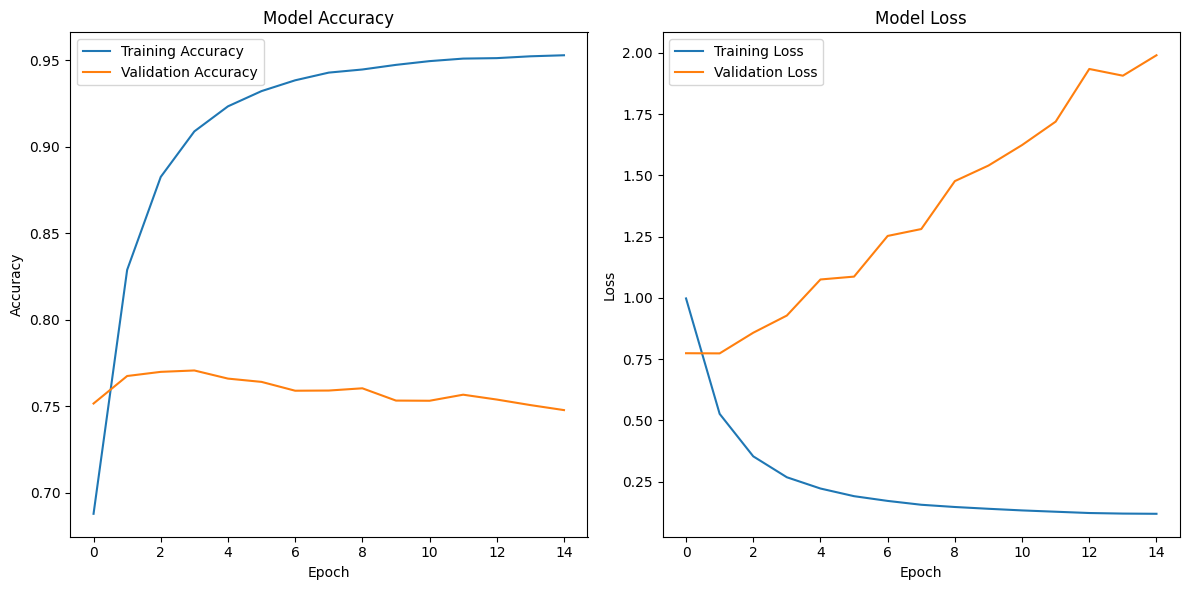

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# اختيار مصفوفة أشعة الكلمات الأفضل بناءً على المهمة 5_2
# تم افتراض أن embedding_matrix هي الأفضل من الطريقة 5_2_3

# ضبط المعاملات الفائقة
filters = 256  # عدد المرشحات
kernel_size = 3  # حجم النواة
dropout_rate = 0.4  # نسبة الإسقاط
learning_rate = 0.0005  # معدل التعلم
epochs = 15  # عدد الدورات
batch_size = 16  # حجم الدفعة

# بناء النموذج
print("\nBuilding the CNN model with tuned hyper-parameters...")
model = Sequential()

# طبقة Embedding (نفس الأفضل في المهمة 5_2)
model.add(Embedding(input_dim=total_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))

# طبقة CNN
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation="relu"))
model.add(GlobalMaxPooling1D())

# طبقات Fully Connected
model.add(Dense(128, activation="relu"))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation="softmax"))

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(
    X_train_padded,
    Y_train_onehot,
    validation_data=(X_val_padded, Y_val_onehot),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# تقييم النموذج
print("\nEvaluating the tuned CNN model on test data...")
test_loss, test_accuracy = model.evaluate(X_test_padded, Y_test_onehot, verbose=0)

# طباعة النتائج
print(f"\nFinal Tuned Model Test Loss: {test_loss:.4f}")
print(f"Final Tuned Model Test Accuracy: {test_accuracy:.4f}")

# إضافة النتائج النهائية إلى الجدول
final_results["question_step_number"].append("5_3")
final_results["model_name"].append("Tuned CNN with Trainable FastText Embedding")
final_results["features"].append(f"FastText Embedding, Conv1D (trainable), tuned filters={filters}, kernel_size={kernel_size}")
final_results["model_parameters"].append(f"dropout_rate={dropout_rate}, learning_rate={learning_rate}, epochs={epochs}, batch_size={batch_size}")
final_results["preprocessing_methods"].append(", ".join(improved_methods))
final_results["accuracy"].append(test_accuracy)
final_results["balance_accuracy"].append("N/A")
final_results["f1_score"].append("N/A")

# تحويل النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)

# طباعة منحنيات التعلم
plt.figure(figsize=(12, 6))

# الدقة
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# الخسارة
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## [5.4]

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


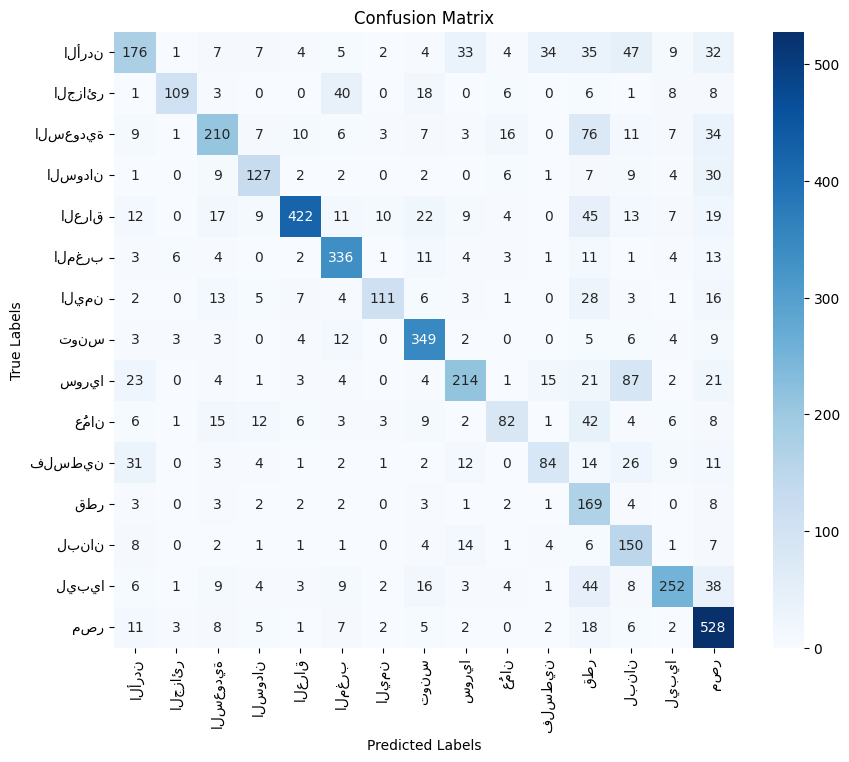


Classification Report:

              precision    recall  f1-score   support

      الأردن       0.60      0.44      0.51       400
     الجزائر       0.87      0.55      0.67       200
    السعودية       0.68      0.53      0.59       400
     السودان       0.69      0.64      0.66       200
      العراق       0.90      0.70      0.79       600
      المغرب       0.76      0.84      0.80       400
       اليمن       0.82      0.56      0.66       200
        تونس       0.76      0.87      0.81       400
       سوريا       0.71      0.54      0.61       400
       عُمان       0.63      0.41      0.50       200
      فلسطين       0.58      0.42      0.49       200
         قطر       0.32      0.84      0.46       200
       لبنان       0.40      0.75      0.52       200
       ليبيا       0.80      0.63      0.70       400
         مصر       0.68      0.88      0.76       600

    accuracy                           0.66      5000
   macro avg       0.68      0.64      0.64      5000
w

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# التنبؤ بالفئات باستخدام بيانات الاختبار
Y_test_pred = model.predict(X_test_padded)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)  # استخراج الفئات المتوقعة
Y_test_true_classes = np.argmax(Y_test_onehot, axis=1)  # الفئات الحقيقية

# حساب مصفوفة التعارض
conf_matrix = confusion_matrix(Y_test_true_classes, Y_test_pred_classes)

# طباعة مصفوفة التعارض
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# طباعة تقرير التصنيف
report = classification_report(Y_test_true_classes, Y_test_pred_classes, target_names=label_encoder.classes_)
print("\nClassification Report:\n")
print(report)


أداء النموذج جيد في اللهجات التي تحتوي على عدد كبير من العينات مثل "العراق" و"مصر".
 والأداء غير متوازن في اللهجات ذات العينات الأقل (مثل قطر ولبنان)، أي أن النموذج يحتاج إلى المزيد من البيانات لتلك الفئات

## [5.5]

مصفوفة التعارضات تعرض نسبة الأخطاء والتداخل بين اللهجات كما توقعها النموذج مثلا التداخل الكبير بين بعض اللهجات (مثل الجزائر والمغرب) يشير إلى التشابه الكبير في النصوص بين هذه اللهجات وهذا يعكس صعوبة فصل هذه اللهجات المتشابهة جغرافياً

بينما ال Heatmap لتقارب اللهجات يعرض التشابه القائم على Cosine Similarity بين اللهجات بناء على توزيع الكلمات والتعبيرات و  اللهجات الجغرافية القريبة (مثل دول المغرب العربي أو دول الخليج) لديها أعلى درجات التشابه بينما اللهجات الأقل تشابهاً جغرافياَ (مثل الشام والخليج) تظهر درجات تشابه أقل

## [5.6]

المدينة

In [ ]:
import pandas as pd
# قراءة البيانات
train_path = "/content/combined/new_combined_train_with_dialects.csv"
val_path = "/content/combined/new_combined_validation_with_dialects.csv"
test_path = "/content/combined/new_combined_test_with_dialects.csv"

train_df = pd.read_csv(train_path , low_memory=False)
val_df = pd.read_csv(val_path , low_memory=False)
test_df = pd.read_csv(test_path , low_memory=False)

# استخراج شعاع الدخل (X) وشعاع الهدف (Y)
X_train, Y_train = train_df["sent"], train_df["lang"]
X_val, Y_val = val_df["sent"], val_df["lang"]
X_test, Y_test = test_df["sent"], test_df["lang"]

# طباعة بعض المعلومات للتحقق
print("Training Data: ", X_train.shape, Y_train.shape)
print("Validation Data: ", X_val.shape, Y_val.shape)
print("Test Data: ", X_test.shape, Y_test.shape)

# طباعة شكل البيانات الخام
print("\nSample Data:")
print(f"X_train: {X_train.head()}")
print(f"Y_train: {Y_train.head()}")
print(f"X_val: {X_val.head()}")
print(f"Y_val: {Y_val.head()}")
print(f"X_test: {X_test.head()}")
print(f"Y_test: {Y_test.head()}")



Training Data:  (1437229,) (1437229,)
Validation Data:  (41101,) (41101,)
Test Data:  (32546,) (32546,)

Sample Data:
X_train: 0    هو هنيك، قدام معلومات السياح بالضبط.
1        مالي سمعان من قبل بهالعنوان هون.
2           روح ساوي لبين ما تشوف صيدلية.
3                            بشقد الفطور؟
4                       شلون بقدر أساعدك؟
Name: sent, dtype: object
Y_train: 0    ALE
1    ALE
2    ALE
3    ALE
4    ALE
Name: lang, dtype: object
X_val: 0         بالمناسبة، اسمي هيروشي إيجيما.
1    هاد القطار بوقف عند ليك فوريست، ما؟
2                      هي البطاقة، تمام؟
3                 ما طلع شي من الماكينة؟
4            في شي خرج آخدو مشان هالطفح؟
Name: sent, dtype: object
Y_val: 0    ALE
1    ALE
2    ALE
3    ALE
4    ALE
Name: lang, dtype: object
X_test: 0          كنت بشتري هاد لو كنت محلك.
1               آسف، هاد المحل محجوز.
2                     شكراً، حاج هيك.
3    إذا سمحت صروف هي الينات لجنيهات.
4                     ساكن بهالمنطقة؟
Name: sent, dtype: object
Y_test: 0    ALE


In [ ]:

# دمج X و Y مؤقتاً للتعامل مع القيم المفقودة
train_df_cleaned = pd.concat([X_train, Y_train], axis=1).dropna()
val_df_cleaned = pd.concat([X_val, Y_val], axis=1).dropna()
test_df_cleaned = pd.concat([X_test, Y_test], axis=1).dropna()

# استخراج X و Y بعد التنظيف
X_train, Y_train= train_df_cleaned["sent"], train_df_cleaned["lang"]
X_val, Y_val = val_df_cleaned["sent"], val_df_cleaned["lang"]
X_test, Y_test= test_df_cleaned["sent"], test_df_cleaned["lang"]

# التحقق من الأشكال بعد الحذف
print(f"Shape of X_train after NaN removal: {X_train.shape}")
print(f"Shape of Y_train after NaN removal: {Y_train.shape}")
print(f"Shape of X_val after NaN removal: {X_val.shape}")
print(f"Shape of Y_val after NaN removal: {Y_val.shape}")
print(f"Shape of X_test after NaN removal: {X_test.shape}")
print(f"Shape of Y_test after NaN removal: {Y_test.shape}")


Shape of X_train after NaN removal: (95600,)
Shape of Y_train after NaN removal: (95600,)
Shape of X_val after NaN removal: (11200,)
Shape of Y_val after NaN removal: (11200,)
Shape of X_test after NaN removal: (5200,)
Shape of Y_test after NaN removal: (5200,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import fasttext
import gc

# تحويل القيم غير النصية في X_train إلى نصوص
X_train = X_train.astype(str)
X_val = X_val.astype(str)
X_test = X_test.astype(str)


# إعداد النصوص والكلمات الفريدة
train_tokens = set(word for sentence in X_train for word in sentence.split())
total_words = len(train_tokens)

# تحميل نموذج FastText
print("\nLoading FastText model...")
fasttext_path = "/content/fasttext/cc.ar.300.bin"  # ضع مسار FastText الخاص بك هنا
fasttext_model = fasttext.load_model(fasttext_path)
fasttext_vocab = set(fasttext_model.get_words())

# إنشاء مصفوفة أشعة الكلمات
embedding_dim = 300
embedding_matrix = np.zeros((total_words + 1, embedding_dim))  # +1 لتعويض الكلمات خارج المفردات

tokenizer = Tokenizer(num_words=total_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

for word, index in tokenizer.word_index.items():
    if word in fasttext_vocab:
        embedding_matrix[index] = fasttext_model.get_word_vector(word)

# تحرير الذاكرة
del fasttext_model
gc.collect()

# تحويل النصوص إلى تسلسلات عددية
max_len = 100  # الطول الأقصى للجمل
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

# تحويل التصنيفات إلى أرقام وتحويلها إلى One-Hot Encoding
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)

Y_train_onehot = to_categorical(Y_train_encoded)
Y_val_onehot = to_categorical(Y_val_encoded)
Y_test_onehot = to_categorical(Y_test_encoded)

num_classes = len(label_encoder.classes_)

# بناء النموذج مع طبقة Embedding قابلة للتعديل (trainable=True)
print("\nBuilding and training the CNN model with trainable FastText Embedding layer...")

model = Sequential()

# طبقة Embedding قابلة للتدريب
model.add(Embedding(input_dim=total_words + 1,  # +1 لتعويض الكلمات خارج المفردات
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))

# طبقة CNN
model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
model.add(GlobalMaxPooling1D())

# طبقات Fully Connected
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(
    X_train_padded,
    Y_train_onehot,
    validation_data=(X_val_padded, Y_val_onehot),
    epochs=10,  # عدد الدورات
    batch_size=8,
    verbose=1
)

# تقييم النموذج على بيانات الاختبار
print("\nEvaluating the CNN model on test data...")
test_loss, test_accuracy = model.evaluate(X_test_padded, Y_test_onehot, verbose=0)

# طباعة النتائج النهائية
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# تثبيت النتائج في جدول النتائج النهائية
final_results["question_step_number"].append("5_6")
final_results["model_name"].append("CNN with Trainable FastText Embedding")
final_results["features"].append("FastText Pretrained Embedding, Conv1D (trainable)")
final_results["model_parameters"].append(f"128 filters, 5 kernel size, 300 embedding dim, max_len={max_len}")
final_results["preprocessing_methods"].append("NaN removal")
final_results["accuracy"].append(test_accuracy)
final_results["balance_accuracy"].append("N/A")
final_results["f1_score"].append("N/A")

# تحويل النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)




Loading FastText model...

Building and training the CNN model with trainable FastText Embedding layer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
11950/11950 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 0.5523 - loss: 1.6175 - val_accuracy: 0.6586 - val_loss: 1.1786
Epoch 2/10
11950/11950 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - accuracy: 0.7265 - loss: 0.8696 - val_accuracy: 0.6744 - val_loss: 1.2546
Epoch 3/10
11950/11950 ━━━━━━━━━━━━━━━━━━━━ 141s 9ms/step - accuracy: 0.7895 - loss: 0.6588 - val_accuracy: 0.6697 - val_loss: 1.4412
Epoch 4/10
11950/11950 ━━━━━━━━━━━━━━━━━━━━ 140s 9ms/step - accuracy: 0.8282 - loss: 0.5425 - val_accuracy: 0.6673 - val_loss: 1.5452
Epoch 5/10
11950/11950 ━━━━━━━━━━━━━━━━━━━━ 129s 8ms/step - accuracy: 0.8525 - loss: 0.4693 - val_accuracy: 0.6546 - val_loss: 1.7972
Epoch 6/10
11950/11950 ━━━━━━━━━━━━━━━━━━━━ 137s 7ms/step - accuracy: 0.8688 - loss: 0.4214 - val_accuracy: 0.6520 - val_loss: 2.0660
Epoch 7/10
11950/11950 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - accuracy: 0.8787 - loss: 0.3988 - val_accuracy: 0.6529 - val_loss: 2.1857
Epoch 8/10
11950/11950 ━━━━━━━━━━━━━━━━━━━━ 88s 7ms/step - accur

تكرار المهمتين للمدينة

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


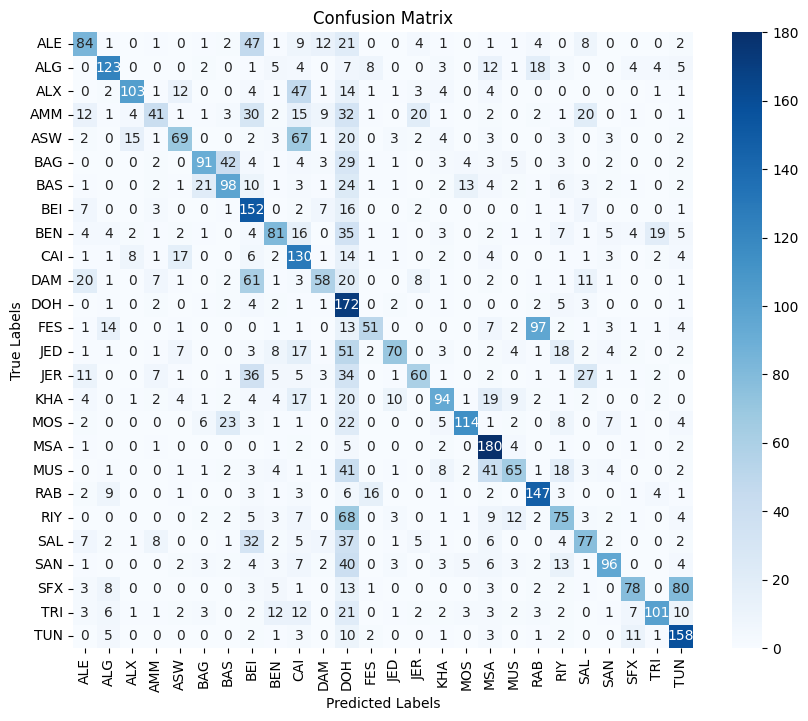


Classification Report:

              precision    recall  f1-score   support

         ALE       0.50      0.42      0.46       200
         ALG       0.68      0.61      0.65       200
         ALX       0.76      0.52      0.61       200
         AMM       0.50      0.20      0.29       200
         ASW       0.57      0.34      0.43       200
         BAG       0.68      0.46      0.54       200
         BAS       0.54      0.49      0.51       200
         BEI       0.36      0.76      0.49       200
         BEN       0.54      0.41      0.46       200
         CAI       0.34      0.65      0.45       200
         DAM       0.53      0.29      0.38       200
         DOH       0.22      0.86      0.35       200
         FES       0.59      0.26      0.36       200
         JED       0.70      0.35      0.47       200
         JER       0.57      0.30      0.39       200
         KHA       0.64      0.47      0.54       200
         MOS       0.80      0.57      0.66       200
  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# تحويل النصوص إلى تسلسلات عددية
X_test_seq = tokenizer.texts_to_sequences(X_test)

# ضبط أطوال التسلسلات لتتناسب مع الطول الأقصى
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

# التنبؤ بالفئات باستخدام بيانات الاختبار
Y_test_pred = model.predict(X_test_padded)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)  # استخراج الفئات المتوقعة
Y_test_true_classes = np.argmax(Y_test_onehot, axis=1)  # الفئات الحقيقية

# حساب مصفوفة التعارض
conf_matrix = confusion_matrix(Y_test_true_classes, Y_test_pred_classes)

# طباعة مصفوفة التعارض
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# طباعة تقرير التصنيف
report = classification_report(Y_test_true_classes, Y_test_pred_classes, target_names=label_encoder.classes_)
print("\nClassification Report:\n")
print(report)


نموذج مصفوفة التعارض يحقق أداءً متفاوتاً على مختلف الفئات. بعض الفئات مثل "DOH" و "BEI" لديها معدلات تمييز عالية مقارنة بفئات أخرى مثل "ALE" و "AMM" و  بعض الفئات لديها تعارض واضح مع أخرى (مثل "MOS" و "MSA"). مما يدل على أن بعض اللهجات ربما تحتوي على أوجه تشابه أدت إلى هذا التعارض

 أداء هذا النموذج متأثر بتشابه اللهجات أي الفئات ذات التشابه العالي في الـ Heatmap لديها معدلات تعارض أعلى في مصفوفة التعارض مما يفسر الأداء المنخفض لبعض الفئات

المناطق

In [ ]:
import pandas as pd
# قراءة البيانات
train_path = "/content/combined/new_combined_train_with_dialects.csv"
val_path = "/content/combined/new_combined_validation_with_dialects.csv"
test_path = "/content/combined/new_combined_test_with_dialects.csv"

train_df = pd.read_csv(train_path , low_memory=False)
val_df = pd.read_csv(val_path , low_memory=False)
test_df = pd.read_csv(test_path , low_memory=False)

# استخراج شعاع الدخل (X) وشعاع الهدف (Y)
X_train_Region, Y_train_Region = train_df["sent"], train_df["Region"]
X_val_Region, Y_val_Region = val_df["sent"], val_df["Region"]
X_test_Region, Y_test_Region = test_df["sent"], test_df["Region"]

# طباعة بعض المعلومات للتحقق
print("Training Data: ", X_train_Region.shape, Y_train_Region.shape)
print("Validation Data: ", X_val_Region.shape, Y_val_Region.shape)
print("Test Data: ", X_test_Region.shape, Y_test_Region.shape)

# طباعة شكل البيانات الخام
print("\nSample Data:")
print(f"X_train: {X_train_Region.head()}")
print(f"Y_train: {Y_train_Region.head()}")
print(f"X_val: {X_val_Region.head()}")
print(f"Y_val: {Y_val_Region.head()}")
print(f"X_test: {X_test_Region.head()}")
print(f"Y_test: {Y_test_Region.head()}")



Training Data:  (1437229,) (1437229,)
Validation Data:  (41101,) (41101,)
Test Data:  (32546,) (32546,)

Sample Data:
X_train: 0    هو هنيك، قدام معلومات السياح بالضبط.
1        مالي سمعان من قبل بهالعنوان هون.
2           روح ساوي لبين ما تشوف صيدلية.
3                            بشقد الفطور؟
4                       شلون بقدر أساعدك؟
Name: sent, dtype: object
Y_train: 0    الشامية
1    الشامية
2    الشامية
3    الشامية
4    الشامية
Name: Region, dtype: object
X_val: 0         بالمناسبة، اسمي هيروشي إيجيما.
1    هاد القطار بوقف عند ليك فوريست، ما؟
2                      هي البطاقة، تمام؟
3                 ما طلع شي من الماكينة؟
4            في شي خرج آخدو مشان هالطفح؟
Name: sent, dtype: object
Y_val: 0    الشامية
1    الشامية
2    الشامية
3    الشامية
4    الشامية
Name: Region, dtype: object
X_test: 0          كنت بشتري هاد لو كنت محلك.
1               آسف، هاد المحل محجوز.
2                     شكراً، حاج هيك.
3    إذا سمحت صروف هي الينات لجنيهات.
4                     ساكن بهالمنطقة؟

In [ ]:

# دمج X و Y مؤقتاً للتعامل مع القيم المفقودة
train_df_cleaned = pd.concat([X_train_Region, Y_train_Region], axis=1).dropna()
val_df_cleaned = pd.concat([X_val_Region, Y_val_Region], axis=1).dropna()
test_df_cleaned = pd.concat([X_test_Region, Y_test_Region], axis=1).dropna()

# استخراج X و Y بعد التنظيف
X_train_Region, Y_train_Region = train_df_cleaned["sent"], train_df_cleaned["Region"]
X_val_Region, Y_val_Region = val_df_cleaned["sent"], val_df_cleaned["Region"]
X_test_Region, Y_test_Region = test_df_cleaned["sent"], test_df_cleaned["Region"]

# التحقق من الأشكال بعد الحذف
print(f"Shape of X_train after NaN removal: {X_train.shape}")
print(f"Shape of Y_train after NaN removal: {Y_train.shape}")
print(f"Shape of X_val after NaN removal: {X_val.shape}")
print(f"Shape of Y_val after NaN removal: {Y_val.shape}")
print(f"Shape of X_test after NaN removal: {X_test.shape}")
print(f"Shape of Y_test after NaN removal: {Y_test.shape}")


Shape of X_train after NaN removal: (85000,)
Shape of Y_train after NaN removal: (85000,)
Shape of X_val after NaN removal: (10000,)
Shape of Y_val after NaN removal: (10000,)
Shape of X_test after NaN removal: (5000,)
Shape of Y_test after NaN removal: (5000,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import fasttext
import gc

# تحويل القيم غير النصية في X_train إلى نصوص
X_train_Region = X_train_Region.astype(str)
X_val_Region = X_val_Region.astype(str)
X_test_Region = X_test_Region.astype(str)


# إعداد النصوص والكلمات الفريدة
train_tokens = set(word for sentence in X_train_Region for word in sentence.split())
total_words = len(train_tokens)

# تحميل نموذج FastText
print("\nLoading FastText model...")
fasttext_path = "/content/fasttext/cc.ar.300.bin"  # ضع مسار FastText الخاص بك هنا
fasttext_model = fasttext.load_model(fasttext_path)
fasttext_vocab = set(fasttext_model.get_words())

# إنشاء مصفوفة أشعة الكلمات
embedding_dim = 300
embedding_matrix = np.zeros((total_words + 1, embedding_dim))  # +1 لتعويض الكلمات خارج المفردات

tokenizer = Tokenizer(num_words=total_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_Region)

for word, index in tokenizer.word_index.items():
    if word in fasttext_vocab:
        embedding_matrix[index] = fasttext_model.get_word_vector(word)

# تحرير الذاكرة
del fasttext_model
gc.collect()

# تحويل النصوص إلى تسلسلات عددية
max_len = 100  # الطول الأقصى للجمل
X_train_seq = tokenizer.texts_to_sequences(X_train_Region)
X_val_seq = tokenizer.texts_to_sequences(X_val_Region)
X_test_seq = tokenizer.texts_to_sequences(X_test_Region)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

# تحويل التصنيفات إلى أرقام وتحويلها إلى One-Hot Encoding
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train_Region)
Y_val_encoded = label_encoder.transform(Y_val_Region)
Y_test_encoded = label_encoder.transform(Y_test_Region)

Y_train_onehot = to_categorical(Y_train_encoded)
Y_val_onehot = to_categorical(Y_val_encoded)
Y_test_onehot = to_categorical(Y_test_encoded)

num_classes = len(label_encoder.classes_)

# بناء النموذج مع طبقة Embedding قابلة للتعديل (trainable=True)
print("\nBuilding and training the CNN model with trainable FastText Embedding layer...")

model = Sequential()

# طبقة Embedding قابلة للتدريب
model.add(Embedding(input_dim=total_words + 1,  # +1 لتعويض الكلمات خارج المفردات
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))

# طبقة CNN
model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
model.add(GlobalMaxPooling1D())

# طبقات Fully Connected
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(
    X_train_padded,
    Y_train_onehot,
    validation_data=(X_val_padded, Y_val_onehot),
    epochs=10,  # عدد الدورات
    batch_size=8,
    verbose=1
)

# تقييم النموذج على بيانات الاختبار
print("\nEvaluating the CNN model on test data...")
test_loss, test_accuracy = model.evaluate(X_test_padded, Y_test_onehot, verbose=0)

# طباعة النتائج النهائية
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# تثبيت النتائج في جدول النتائج النهائية
final_results["question_step_number"].append("5_6")
final_results["model_name"].append("CNN with Trainable FastText Embedding")
final_results["features"].append("FastText Pretrained Embedding, Conv1D (trainable)")
final_results["model_parameters"].append(f"128 filters, 5 kernel size, 300 embedding dim, max_len={max_len}")
final_results["preprocessing_methods"].append("NaN removal")
final_results["accuracy"].append(test_accuracy)
final_results["balance_accuracy"].append("N/A")
final_results["f1_score"].append("N/A")

# تحويل النتائج النهائية إلى DataFrame
final_results_df = pd.DataFrame(final_results)

# طباعة جدول النتائج النهائية
print("\nFinal Results Table:")
print(final_results_df)




Loading FastText model...

Building and training the CNN model with trainable FastText Embedding layer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - accuracy: 0.7651 - loss: 0.6205 - val_accuracy: 0.8420 - val_loss: 0.4092
Epoch 2/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 87s 8ms/step - accuracy: 0.9043 - loss: 0.2764 - val_accuracy: 0.8489 - val_loss: 0.4241
Epoch 3/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9381 - loss: 0.1773 - val_accuracy: 0.8462 - val_loss: 0.4745
Epoch 4/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - accuracy: 0.9507 - loss: 0.1397 - val_accuracy: 0.8506 - val_loss: 0.5516
Epoch 5/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9584 - loss: 0.1162 - val_accuracy: 0.8412 - val_loss: 0.5977
Epoch 6/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.9611 - loss: 0.1054 - val_accuracy: 0.8377 - val_loss: 0.7060
Epoch 7/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9638 - loss: 0.0960 - val_accuracy: 0.8370 - val_loss: 0.7419
Epoch 8/10
10625/10625 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 

تكرار المهمتين للمنطقة

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


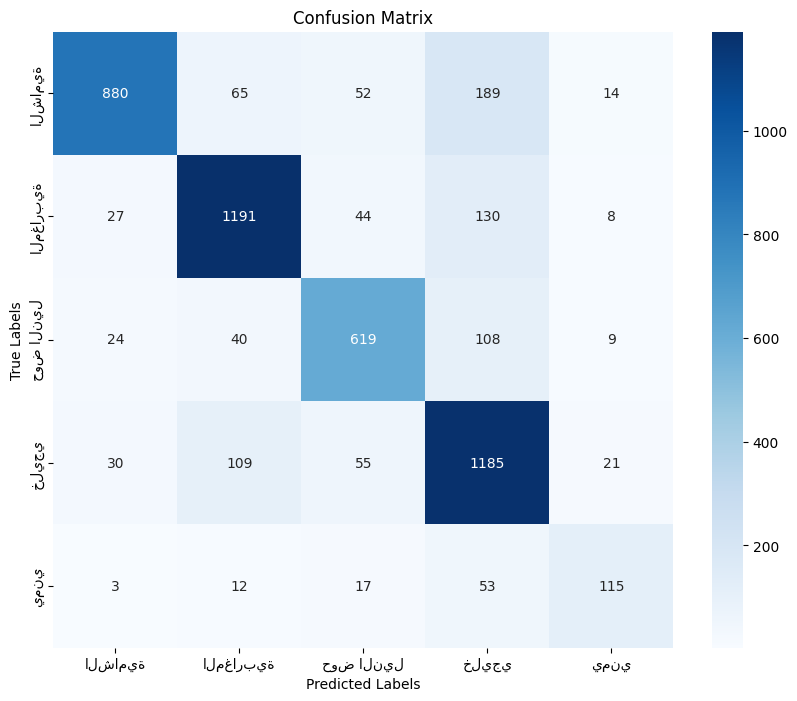


Classification Report:

              precision    recall  f1-score   support

     الشامية       0.91      0.73      0.81      1200
   المغاربية       0.84      0.85      0.85      1400
   حوض النيل       0.79      0.77      0.78       800
       خليجي       0.71      0.85      0.77      1400
        يمني       0.69      0.57      0.63       200

    accuracy                           0.80      5000
   macro avg       0.79      0.76      0.77      5000
weighted avg       0.81      0.80      0.80      5000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# تحويل النصوص إلى تسلسلات عددية
X_test_seq = tokenizer.texts_to_sequences(X_test_Region)

# ضبط أطوال التسلسلات لتتناسب مع الطول الأقصى
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

# التنبؤ بالفئات باستخدام بيانات الاختبار
Y_test_pred = model.predict(X_test_padded)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)  # استخراج الفئات المتوقعة
Y_test_true_classes = np.argmax(Y_test_onehot, axis=1)  # الفئات الحقيقية

# حساب مصفوفة التعارض
conf_matrix = confusion_matrix(Y_test_true_classes, Y_test_pred_classes)

# طباعة مصفوفة التعارض
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# طباعة تقرير التصنيف
report = classification_report(Y_test_true_classes, Y_test_pred_classes, target_names=label_encoder.classes_)
print("\nClassification Report:\n")
print(report)


مصفوفة التعارض (Confusion Matrix)
اللهجة الشامية والمغاربية تحققان أداء جيد مع تعارض محدود مع اللهجات الأخرى.
اللهجة اليمنية تظهر أصعب تمييزاً، حيث يتم التعرف عليها بشكل صحيح بنسبة منخفضة
اللهجة الخليجية وحوض النيل يظهران أداءً جيداً

تحليل التشابه (Heatmap):

هناك تداخل بين بعض اللهجات مثل الشامية والخليجية، وحوض النيل والخليج.
اللهجات المغاربية تظهر تميز واضح مما يسهم في أدائها الجيد
اللهجة اليمنية تظهر تشابه أقل مع اللهجات الأخرى، مما يُفسر ضعف تمييزها

# مهمة 06 : التمثيل الداللي

Semantic representation

## [6.1]

In [ ]:
from sklearn.decomposition import PCA
# 2. إعداد البيانات
# تطبيق الدالة على المستويات الثلاثة
train_unique_by_lang = find_unique_words(combined_train_df, 'Country', 'Region', 'lang', 'sent', threshold=2)
train_unique_by_region = find_unique_words(combined_train_df, 'Country', 'Region', 'lang', 'sent', threshold=2)
train_unique_by_country = find_unique_words(combined_train_df, 'Country', 'Region', 'lang', 'sent', threshold=2)

# إعداد البيانات لاستخدامها في الرسم البياني
unique_words_by_lang = train_unique_by_lang
unique_words_by_region = train_unique_by_region
unique_words_by_country = train_unique_by_country

# 3. دالة للحصول على التضمينات
def get_embeddings(words):
    # تأكد من أن الكلمات هي قائمة من الكلمات فقط
    return [fasttext_model.get_word_vector(word) for word, count in words]  # استخدم فقط الكلمة

# 4. رسم النقاط باستخدام t-SNE مع PCA
def plot_words(unique_words, title):
    all_words = []
    all_labels = []
    embeddings_list = []

    for label, words in unique_words.items():
        cleaned_words = [(word, count) for word, count in words]
        embeddings = get_embeddings(cleaned_words)
        embeddings_list.append(embeddings)
        all_words.extend(words)
        all_labels.extend([label] * len(words))

    all_embeddings = np.array([embedding for sublist in embeddings_list for embedding in sublist])

    # استخدام PCA لتقليل الأبعاد إلى 50
    pca = PCA(n_components=50)
    pca_result = pca.fit_transform(all_embeddings)

    # تطبيق t-SNE على نتائج PCA
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    reduced_embeddings = tsne.fit_transform(pca_result)

    # رسم النقاط
    plt.figure(figsize=(10, 7))
    for i, label in enumerate(all_labels):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=label)

    plt.title(title)
    plt.xlabel('البعد الأول')
    plt.ylabel('البعد الثاني')
    plt.legend()
    plt.show()

# 5. رسم النتائج لكل مستوى
plot_words(unique_words_by_lang, 'تمثيل الكلمات المميزة حسب اللهجة')
plot_words(unique_words_by_region, 'تمثيل الكلمات المميزة حسب المناطق')
plot_words(unique_words_by_country, 'تمثيل الكلمات المميزة حسب البلدان')

NameError: name 'find_unique_words' is not defined

## [6.2]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# دالة للحصول على التضمينات
def get_embeddings(words):
    return [fasttext_model.get_word_vector(word) for word, _ in words]  # استخدم فقط الكلمة

# دالة لرسم النقاط باستخدام t-SNE
def plot_words(unique_words, title):
    all_embeddings = []
    all_labels = []

    for label, words in unique_words.items():
        embeddings = get_embeddings(words)  # استخدم دالة get_embeddings
        all_embeddings.extend(embeddings)
        all_labels.extend([label] * len(words))

    # تحويل القائمة إلى مصفوفة NumPy
    all_embeddings = np.array(all_embeddings)

    # استخدام PCA لتقليل الأبعاد إلى 50
    pca = PCA(n_components=50)
    pca_result = pca.fit_transform(all_embeddings)

    # تطبيق t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    reduced_embeddings = tsne.fit_transform(pca_result)

    # رسم النقاط
    plt.figure(figsize=(10, 7))
    for i, label in enumerate(all_labels):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=label)

    plt.title(title)
    plt.xlabel('البعد الأول')
    plt.ylabel('البعد الثاني')
    plt.legend()
    plt.show()

# رسم النتائج لكل مستوى
plot_words(unique_words_by_lang, 'تمثيل الكلمات المميزة حسب اللهجة')
plot_words(unique_words_by_region, 'تمثيل الكلمات المميزة حسب المناطق')
plot_words(unique_words_by_country, 'تمثيل الكلمات المميزة حسب البلدان')

# Final Results

In [ ]:
df = pd.DataFrame(comparison_table)
df

In [ ]:
df.to_csv("[your_name].csv", index=False)